In [1]:
import os
os.chdir(r"/content/drive/MyDrive/TA/dataset")

In [2]:
import pandas as pd
import re
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re, string, unicodedata
import nltk
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [3]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data = pd.read_csv('labeled_dataset.csv',encoding="ISO-8859-1")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CleanName     4011 non-null   object
 1   CleanComment  3777 non-null   object
 2   Labels        4966 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 116.5+ KB


In [5]:
data.head(10)

,CleanName,CleanComment,Labels
0,lucas marcos capasso,bro pls need antikx comment,0
1,sleepybim,try make video accidentally make jerma,0
2,mtacrdipo,holly shit somebody else still use quot quot f...,0
3,spr kogkreativitet,NaN,0
4,spr kogkreativitet,jeg elsker deg,0
5,cat bus record,best segway add exist far,0
6,yone,pewds get coverd,0
7,ayleen mckenzie vlogs,imagine think chat turn chat pewdiepie without...,0
8,ayleen mckenzie vlogs,laugh way hard felix shock pikachu face human ...,0
9,applejuke,tack underh llande videorna ger mig dje min va...,0


In [6]:
data

,CleanName,CleanComment,Labels
0,lucas marcos capasso,bro pls need antikx comment,0
1,sleepybim,try make video accidentally make jerma,0
2,mtacrdipo,holly shit somebody else still use quot quot f...,0
3,spr kogkreativitet,NaN,0
4,spr kogkreativitet,jeg elsker deg,0
...,...,...,...
4961,FreeGiftsNow456,Congratulations! You've won a free trip to an ...,1
4962,MoneyDoublingScheme789,Double your money in just 24 hours! Join our e...,1
4963,InstantWeightLoss123,Lose weight instantly with our magical weight ...,1
4964,MoneyBackGuarantee123,100% money-back guarantee on all purchases. Sh...,1


In [7]:
data.dropna(inplace=True)

In [8]:
data['char_lenName']= data['CleanName'].apply(len)
data['char_lenComment']= data['CleanComment'].apply(len)
data.head(10)

,CleanName,CleanComment,Labels,char_lenName,char_lenComment
0,lucas marcos capasso,bro pls need antikx comment,0,20,27
1,sleepybim,try make video accidentally make jerma,0,9,38
2,mtacrdipo,holly shit somebody else still use quot quot f...,0,9,73
4,spr kogkreativitet,jeg elsker deg,0,18,14
5,cat bus record,best segway add exist far,0,14,25
6,yone,pewds get coverd,0,4,16
7,ayleen mckenzie vlogs,imagine think chat turn chat pewdiepie without...,0,21,51
8,ayleen mckenzie vlogs,laugh way hard felix shock pikachu face human ...,0,21,98
9,applejuke,tack underh llande videorna ger mig dje min va...,0,9,181
10,flynn mclennan,pewdiepie sub mrbest,1,14,20


In [9]:
data['word_lenName'] = data['CleanName'].apply(lambda x:len(nltk.word_tokenize(x)))
data['word_lenComment'] = data['CleanComment'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(10)

,CleanName,CleanComment,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment
0,lucas marcos capasso,bro pls need antikx comment,0,20,27,3,5
1,sleepybim,try make video accidentally make jerma,0,9,38,1,6
2,mtacrdipo,holly shit somebody else still use quot quot f...,0,9,73,1,13
4,spr kogkreativitet,jeg elsker deg,0,18,14,2,3
5,cat bus record,best segway add exist far,0,14,25,3,5
6,yone,pewds get coverd,0,4,16,1,3
7,ayleen mckenzie vlogs,imagine think chat turn chat pewdiepie without...,0,21,51,3,8
8,ayleen mckenzie vlogs,laugh way hard felix shock pikachu face human ...,0,21,98,3,16
9,applejuke,tack underh llande videorna ger mig dje min va...,0,9,181,1,32
10,flynn mclennan,pewdiepie sub mrbest,1,14,20,2,3


In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def preprocessing(text):
    if pd.isnull(text):
        return ''
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text = text.lower()
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(word=w, pos='v') for w in text]
    text = [i for i in text if len(i) > 2]
    text = ' '.join(text)
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
data['Username']=data['CleanName'].apply(lambda x:preprocessing(x))
data['Comment']=data['CleanComment'].apply(lambda x:preprocessing(x))
data.head()

,CleanName,CleanComment,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment,Username,Comment
0,lucas marcos capasso,bro pls need antikx comment,0,20,27,3,5,lucas marcos capasso,bro pls need antikx comment
1,sleepybim,try make video accidentally make jerma,0,9,38,1,6,sleepybim,try make video accidentally make jerma
2,mtacrdipo,holly shit somebody else still use quot quot f...,0,9,73,1,13,mtacrdipo,holly shit somebody else still use quot quot f...
4,spr kogkreativitet,jeg elsker deg,0,18,14,2,3,spr kogkreativitet,jeg elsker deg
5,cat bus record,best segway add exist far,0,14,25,3,5,cat bus record,best segway add exist far


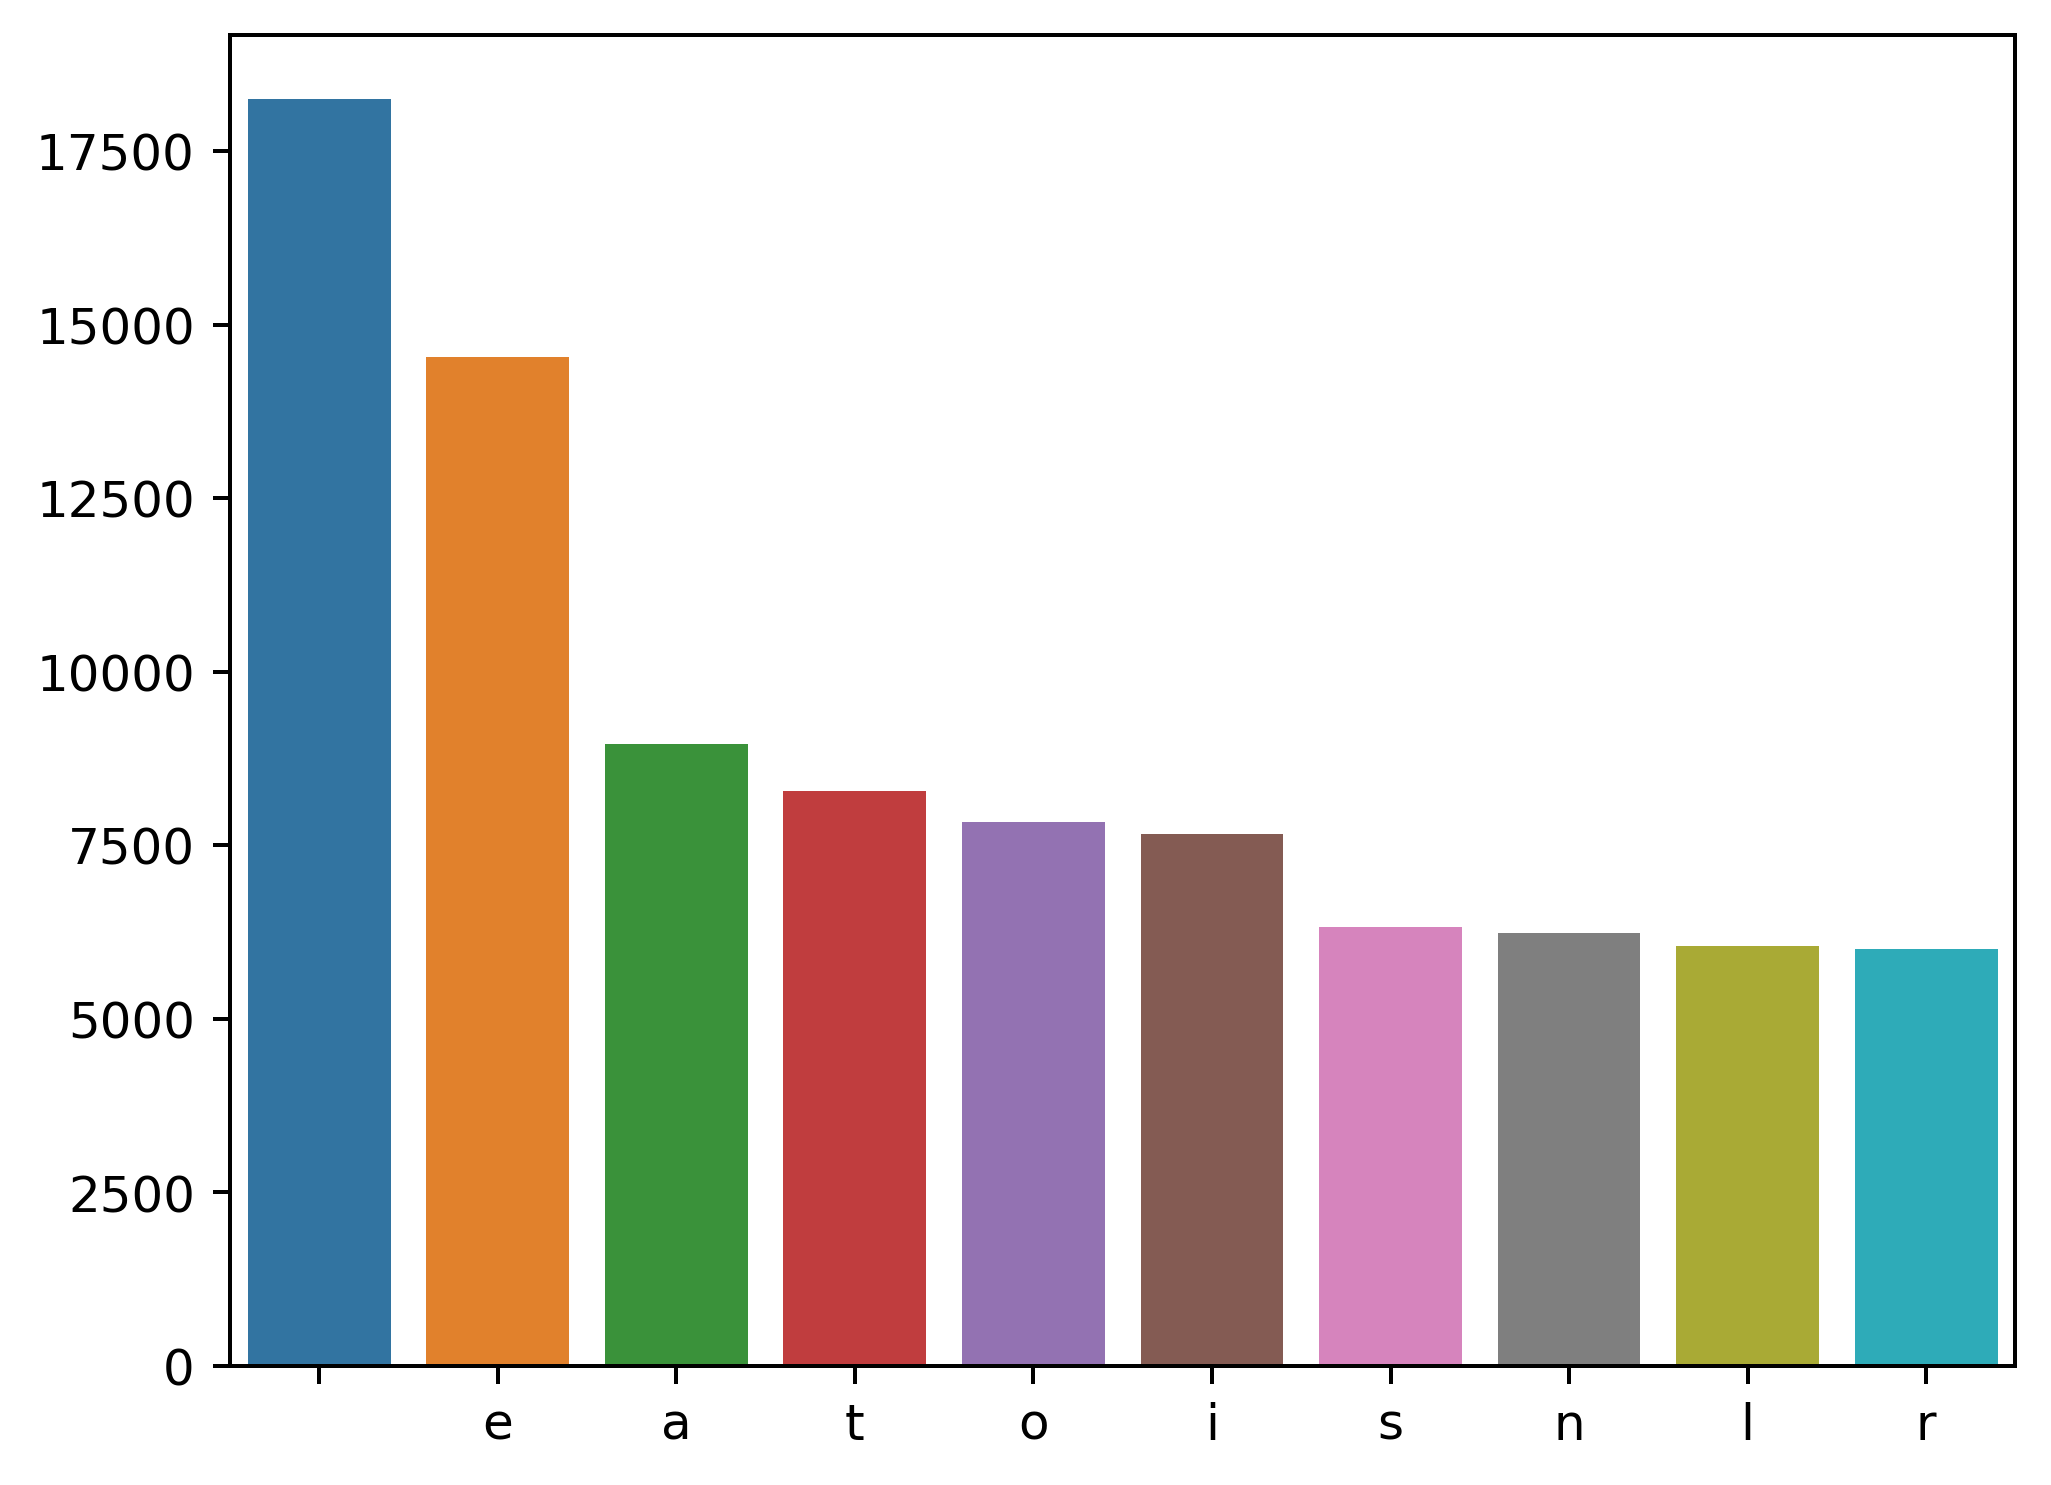

In [13]:
# # Get a list of all the tokens in the 'Comment' column
all_tokens = [tokens for sublist in data['Comment'] for tokens in sublist]

# # Count the frequency of each word
word_counts = Counter(all_tokens)

# # Get the top N most common words
N = 10
top_words = word_counts.most_common(N)

# # Extract the words and their frequencies into separate lists
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.rcParams["figure.dpi"] = 360
plt.bar(words, counts)

# Set the color palette
# sns.set_palette(sns.color_palette("hls", 10))

sns.barplot(x=words, y=counts)
plt.show()

### EDA

In [14]:
data.nunique()

CleanName          3048
CleanComment       3190
Labels                2
char_lenName         33
char_lenComment     191
word_lenName          6
word_lenComment      51
Username           3047
Comment            3190
dtype: int64

In [15]:
data.isnull().sum()

CleanName          0
CleanComment       0
Labels             0
char_lenName       0
char_lenComment    0
word_lenName       0
word_lenComment    0
Username           0
Comment            0
dtype: int64

In [16]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CleanName,3644,3048,real pewdiepie,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CleanComment,3644,3190,textme quest,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Labels,3644.0,NaN,NaN,NaN,0.098518,0.298055,0.0,0.0,0.0,0.0,1.0
char_lenName,3644.0,NaN,NaN,NaN,10.67371,4.82061,3.0,7.0,11.0,13.0,46.0
char_lenComment,3644.0,NaN,NaN,NaN,36.674533,51.351458,3.0,12.0,25.0,47.0,1483.0
word_lenName,3644.0,NaN,NaN,NaN,1.633644,0.700558,1.0,1.0,2.0,2.0,6.0
word_lenComment,3644.0,NaN,NaN,NaN,6.022228,7.801532,1.0,2.0,4.0,8.0,227.0
Username,3644,3047,real pewdiepie,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comment,3644,3190,textme quest,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['CleanName', 'CleanComment', 'Username', 'Comment'], dtype='object')
Numerical Variables:
['Labels', 'char_lenName', 'char_lenComment', 'word_lenName', 'word_lenComment']


In [18]:
data.head()

,CleanName,CleanComment,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment,Username,Comment
0,lucas marcos capasso,bro pls need antikx comment,0,20,27,3,5,lucas marcos capasso,bro pls need antikx comment
1,sleepybim,try make video accidentally make jerma,0,9,38,1,6,sleepybim,try make video accidentally make jerma
2,mtacrdipo,holly shit somebody else still use quot quot f...,0,9,73,1,13,mtacrdipo,holly shit somebody else still use quot quot f...
4,spr kogkreativitet,jeg elsker deg,0,18,14,2,3,spr kogkreativitet,jeg elsker deg
5,cat bus record,best segway add exist far,0,14,25,3,5,cat bus record,best segway add exist far


In [19]:
data

,CleanName,CleanComment,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment,Username,Comment
0,lucas marcos capasso,bro pls need antikx comment,0,20,27,3,5,lucas marcos capasso,bro pls need antikx comment
1,sleepybim,try make video accidentally make jerma,0,9,38,1,6,sleepybim,try make video accidentally make jerma
2,mtacrdipo,holly shit somebody else still use quot quot f...,0,9,73,1,13,mtacrdipo,holly shit somebody else still use quot quot f...
4,spr kogkreativitet,jeg elsker deg,0,18,14,2,3,spr kogkreativitet,jeg elsker deg
5,cat bus record,best segway add exist far,0,14,25,3,5,cat bus record,best segway add exist far
...,...,...,...,...,...,...,...,...,...
4961,FreeGiftsNow456,Congratulations! You've won a free trip to an ...,1,15,87,1,18,freegiftsnow,congratulations free trip exotic destination c...
4962,MoneyDoublingScheme789,Double your money in just 24 hours! Join our e...,1,22,97,1,17,moneydoublingscheme,double money hours join exclusive investment p...
4963,InstantWeightLoss123,Lose weight instantly with our magical weight ...,1,20,96,1,19,instantweightloss,lose weight instantly magical weight loss pill...
4964,MoneyBackGuarantee123,100% money-back guarantee on all purchases. Sh...,1,21,82,1,14,moneybackguarantee,money back guarantee purchase shop confidence ...


In [20]:
data.describe()

,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment
count,3644.000000,3644.00000,3644.000000,3644.000000,3644.000000
mean,0.098518,10.67371,36.674533,1.633644,6.022228
std,0.298055,4.82061,51.351458,0.700558,7.801532
min,0.000000,3.00000,3.000000,1.000000,1.000000
25%,0.000000,7.00000,12.000000,1.000000,2.000000
50%,0.000000,11.00000,25.000000,2.000000,4.000000
75%,0.000000,13.00000,47.000000,2.000000,8.000000
max,1.000000,46.00000,1483.000000,6.000000,227.000000


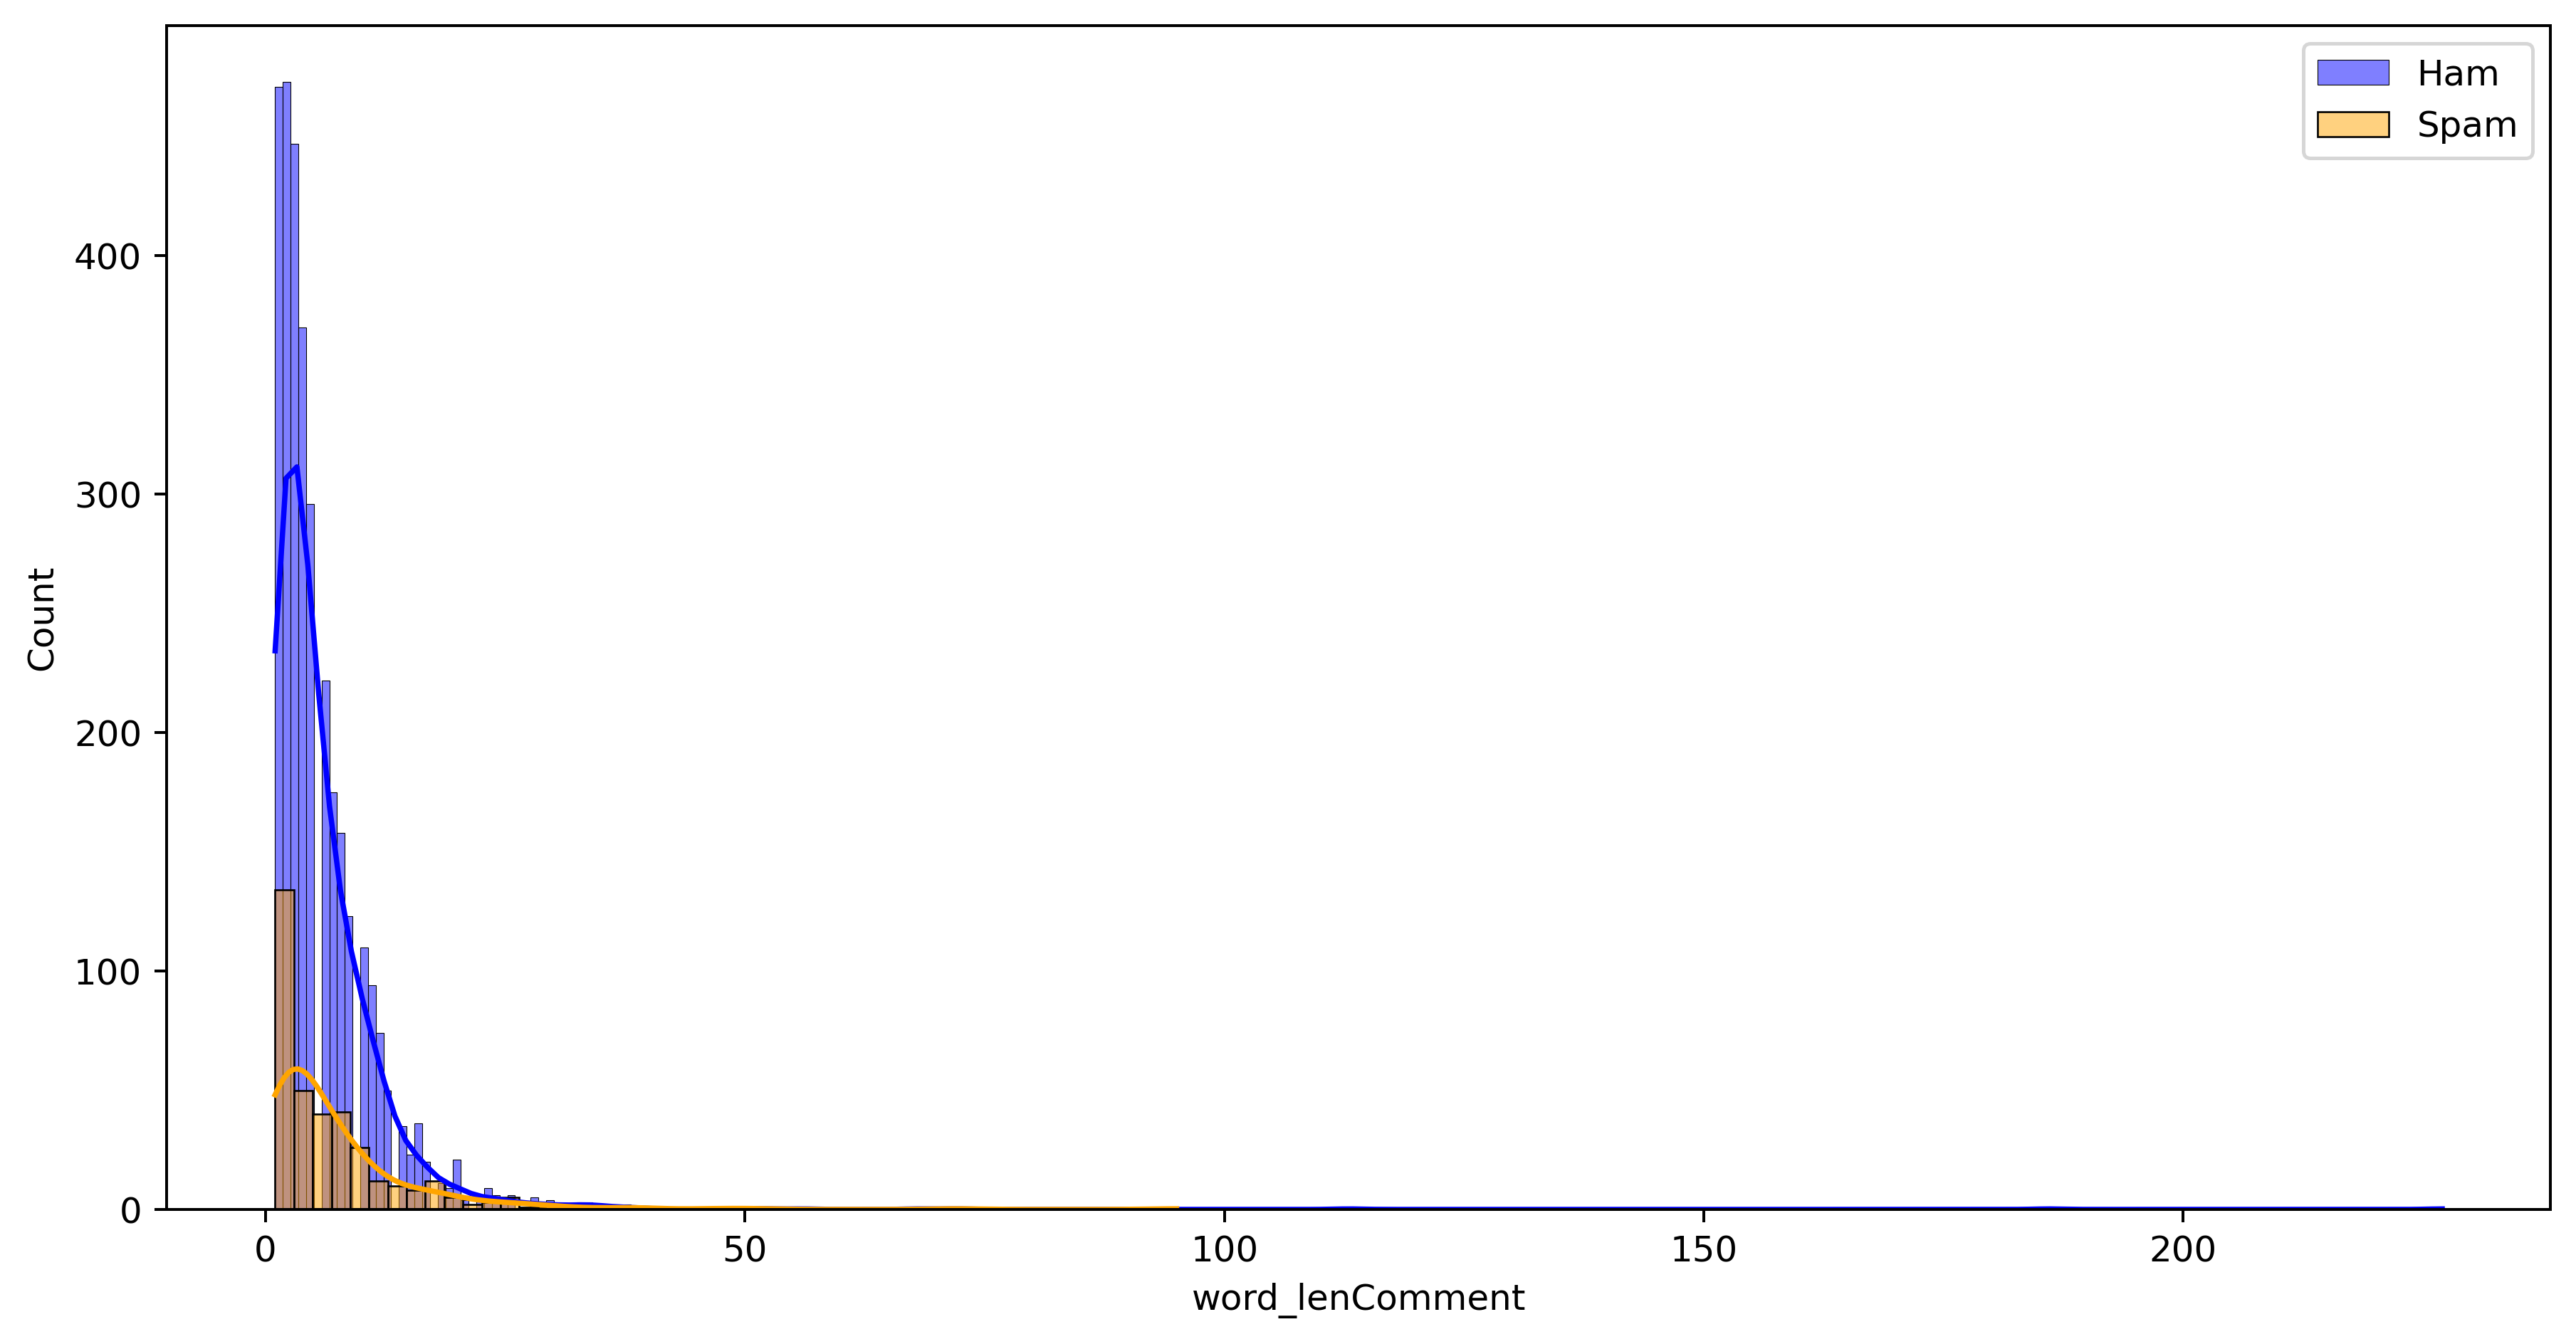

In [21]:
plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 360
sns.histplot(data= data[data['Labels']==0], x="word_lenComment", color="blue", label="Ham", kde=True)
sns.histplot(data= data[data['Labels']==1], x="word_lenComment", color="orange", label="Spam", kde=True)
plt.legend()
plt.show()

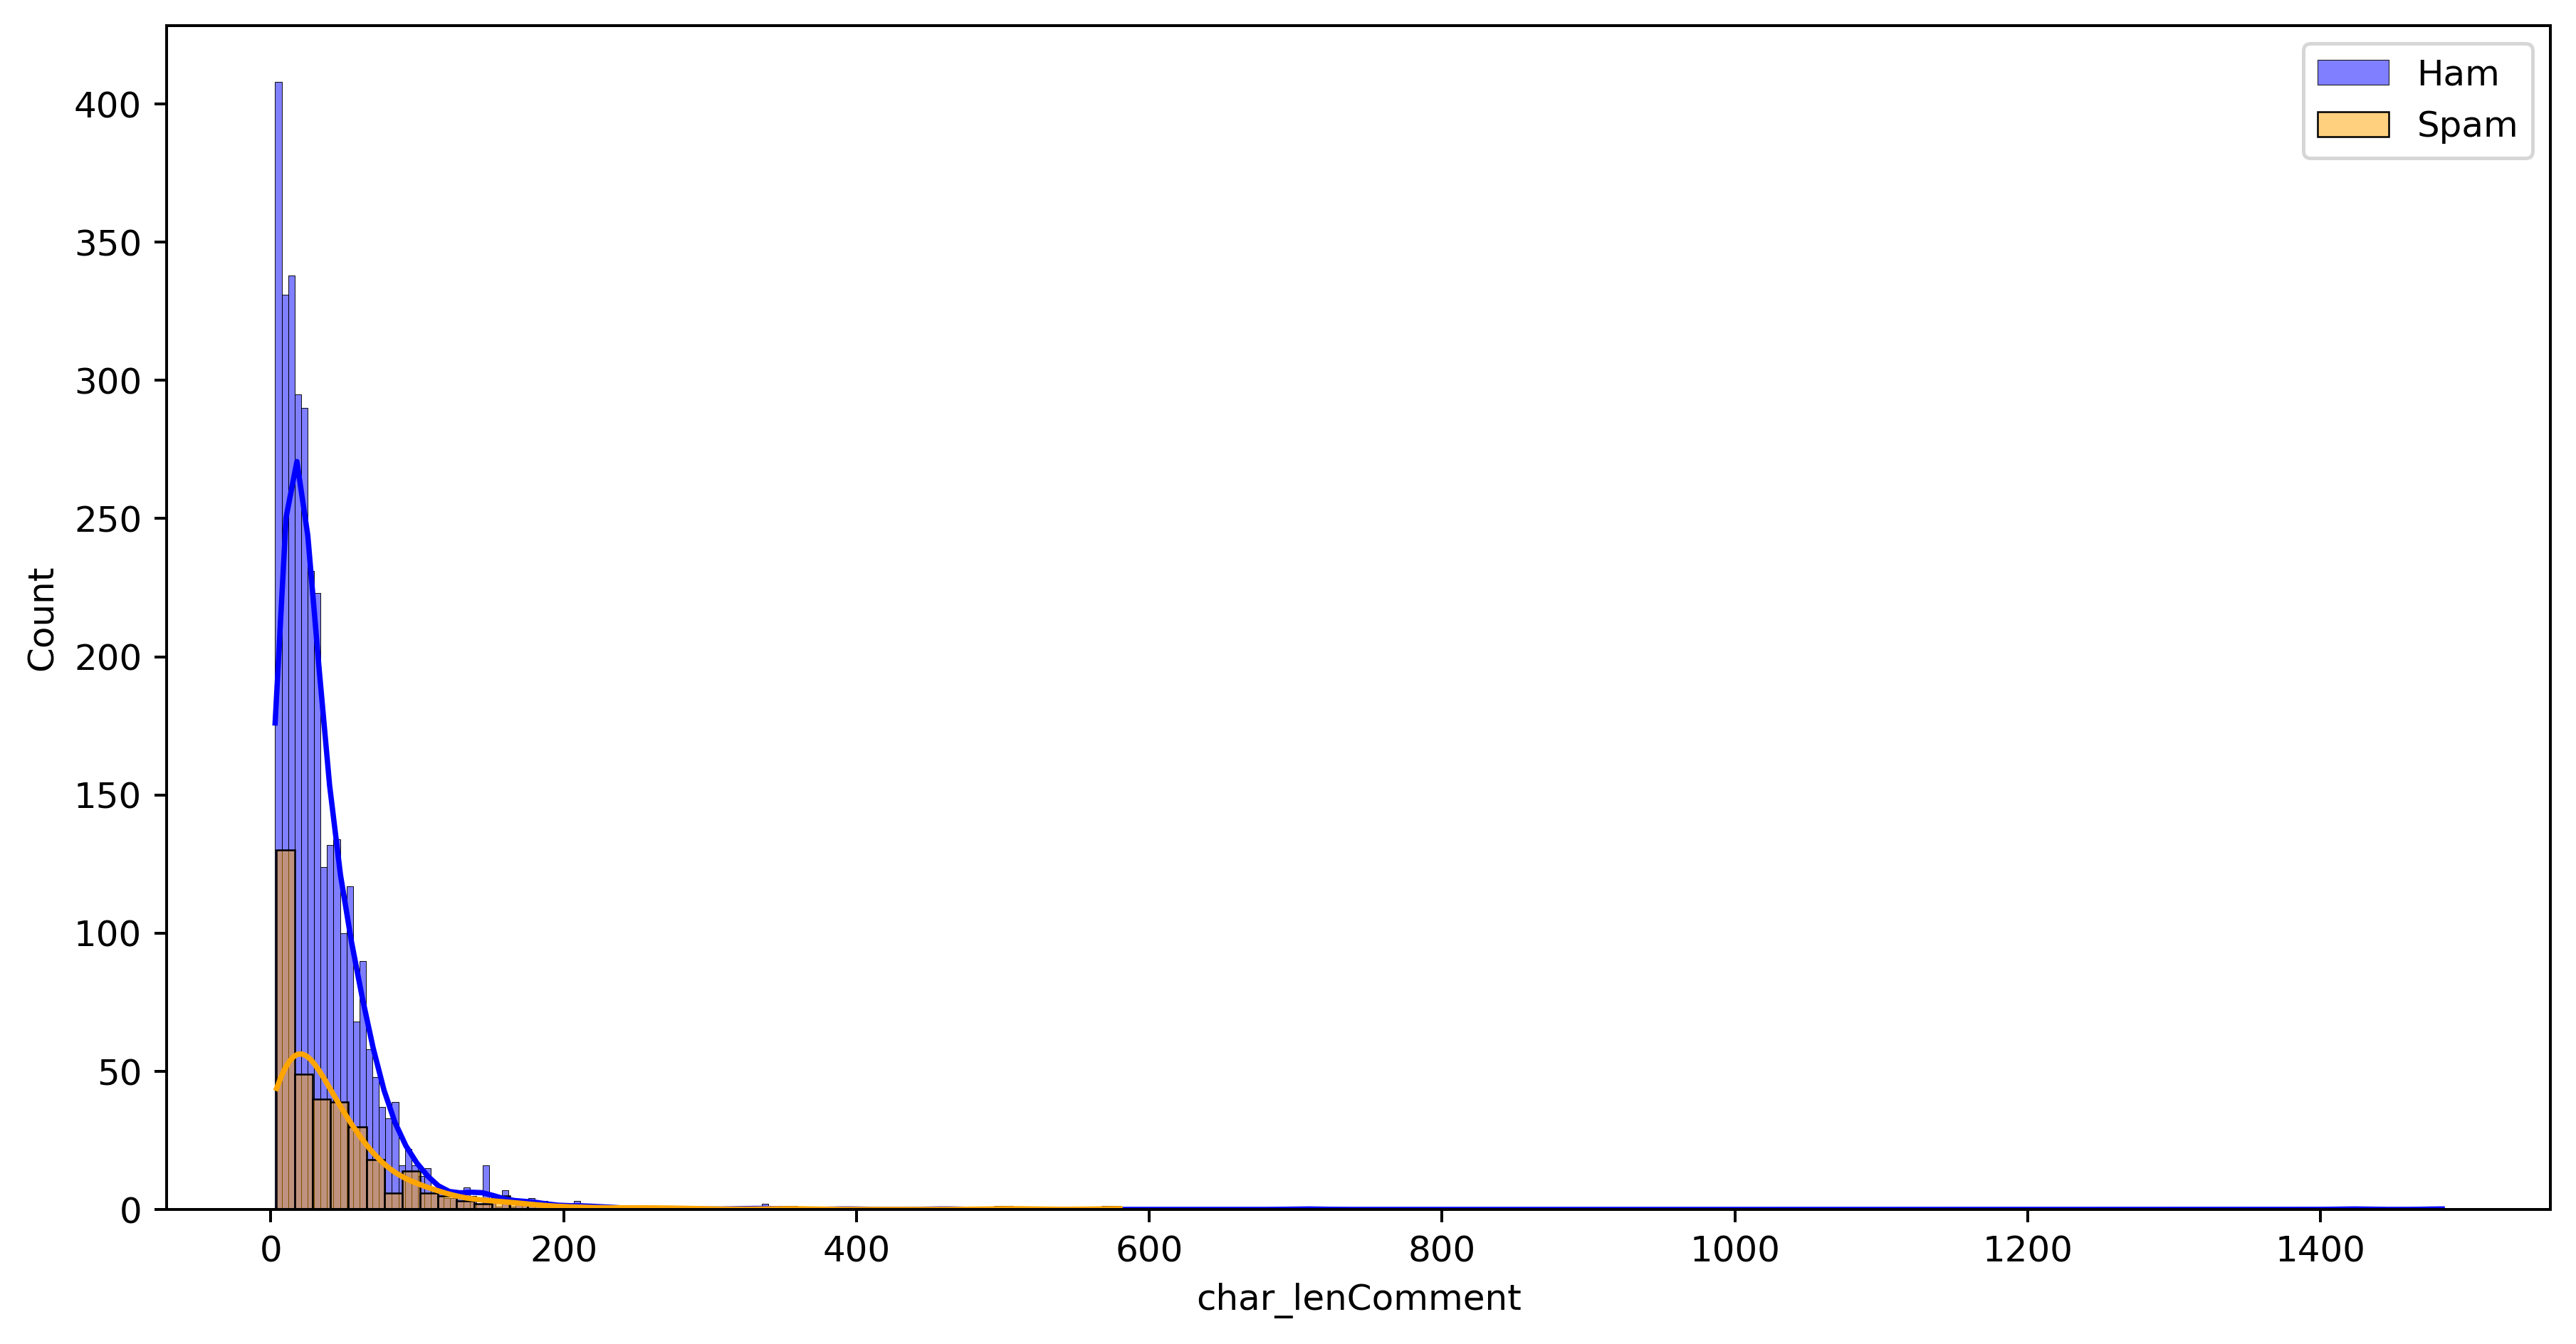

In [22]:
plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 360
sns.histplot(data= data[data['Labels']==0], x="char_lenComment", color="blue", label="Ham", kde=True)
sns.histplot(data= data[data['Labels']==1], x="char_lenComment", color="orange", label="Spam", kde=True)
plt.legend()
plt.show()

<Figure size 4320x2160 with 0 Axes>

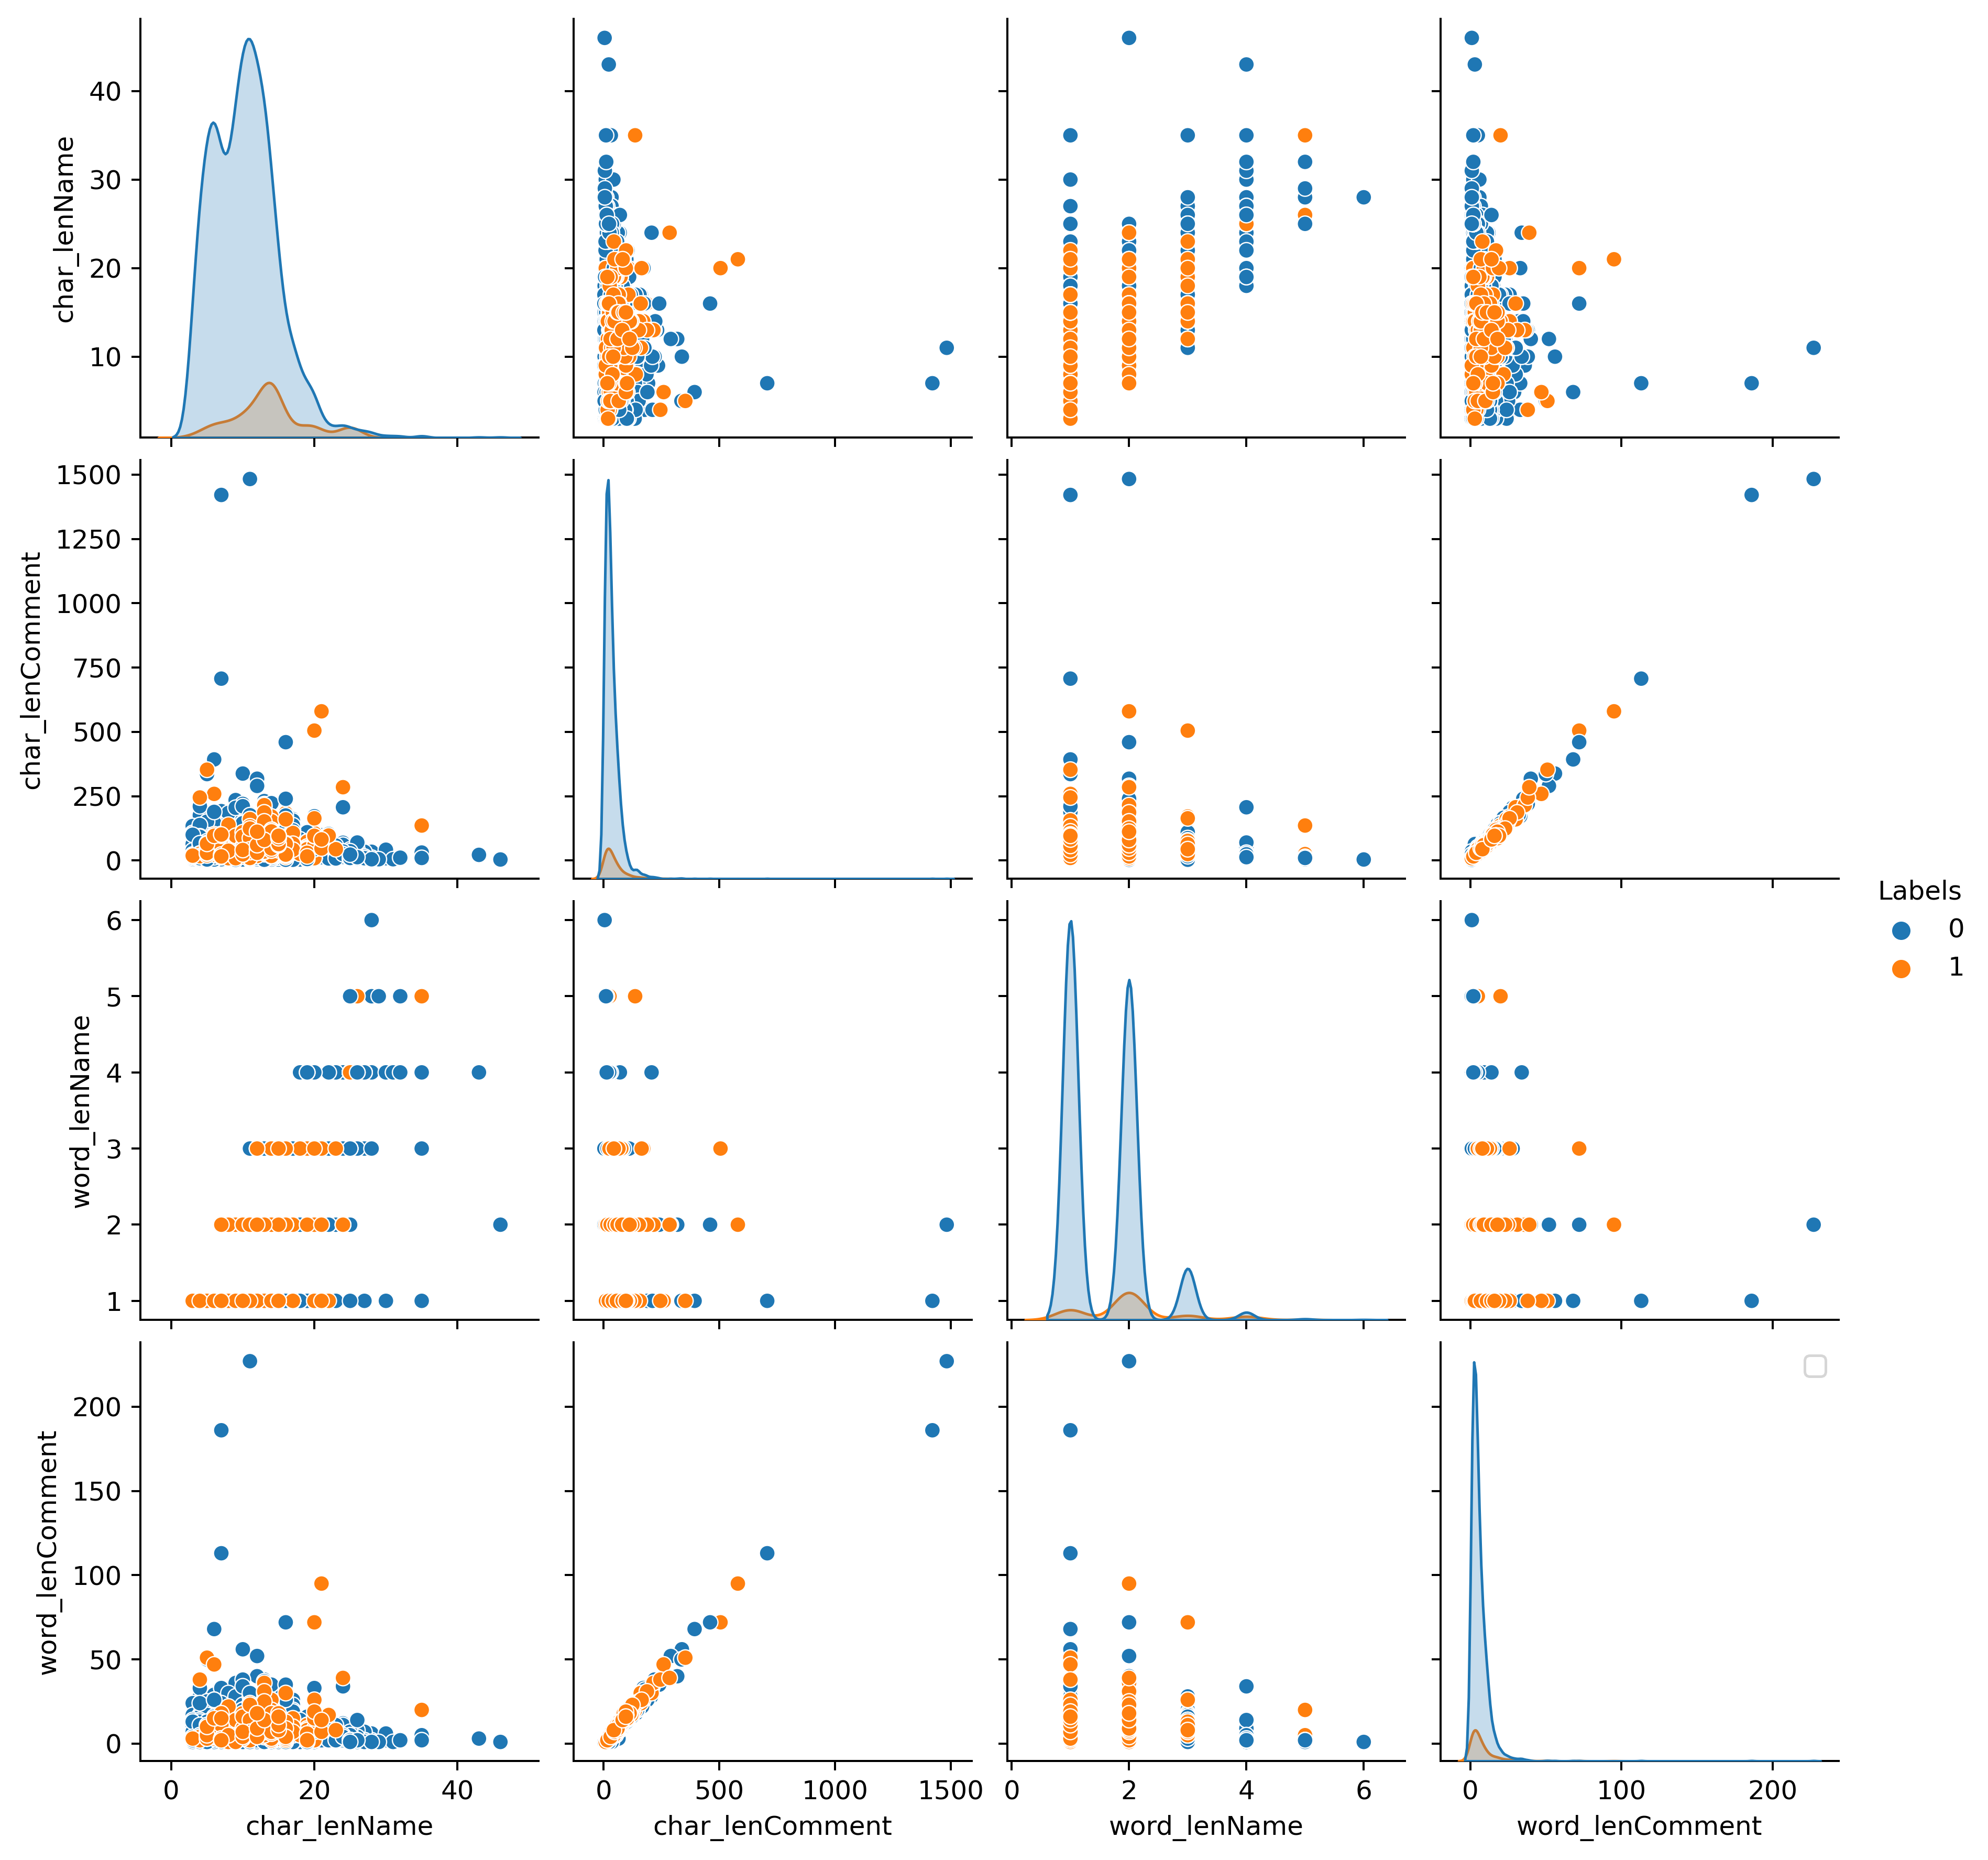

In [23]:
plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 360
sns.pairplot(data, hue ='Labels')
plt.legend()
plt.show()

<ipython-input-24-39845046badd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Labels'], hist=True, kde=True,


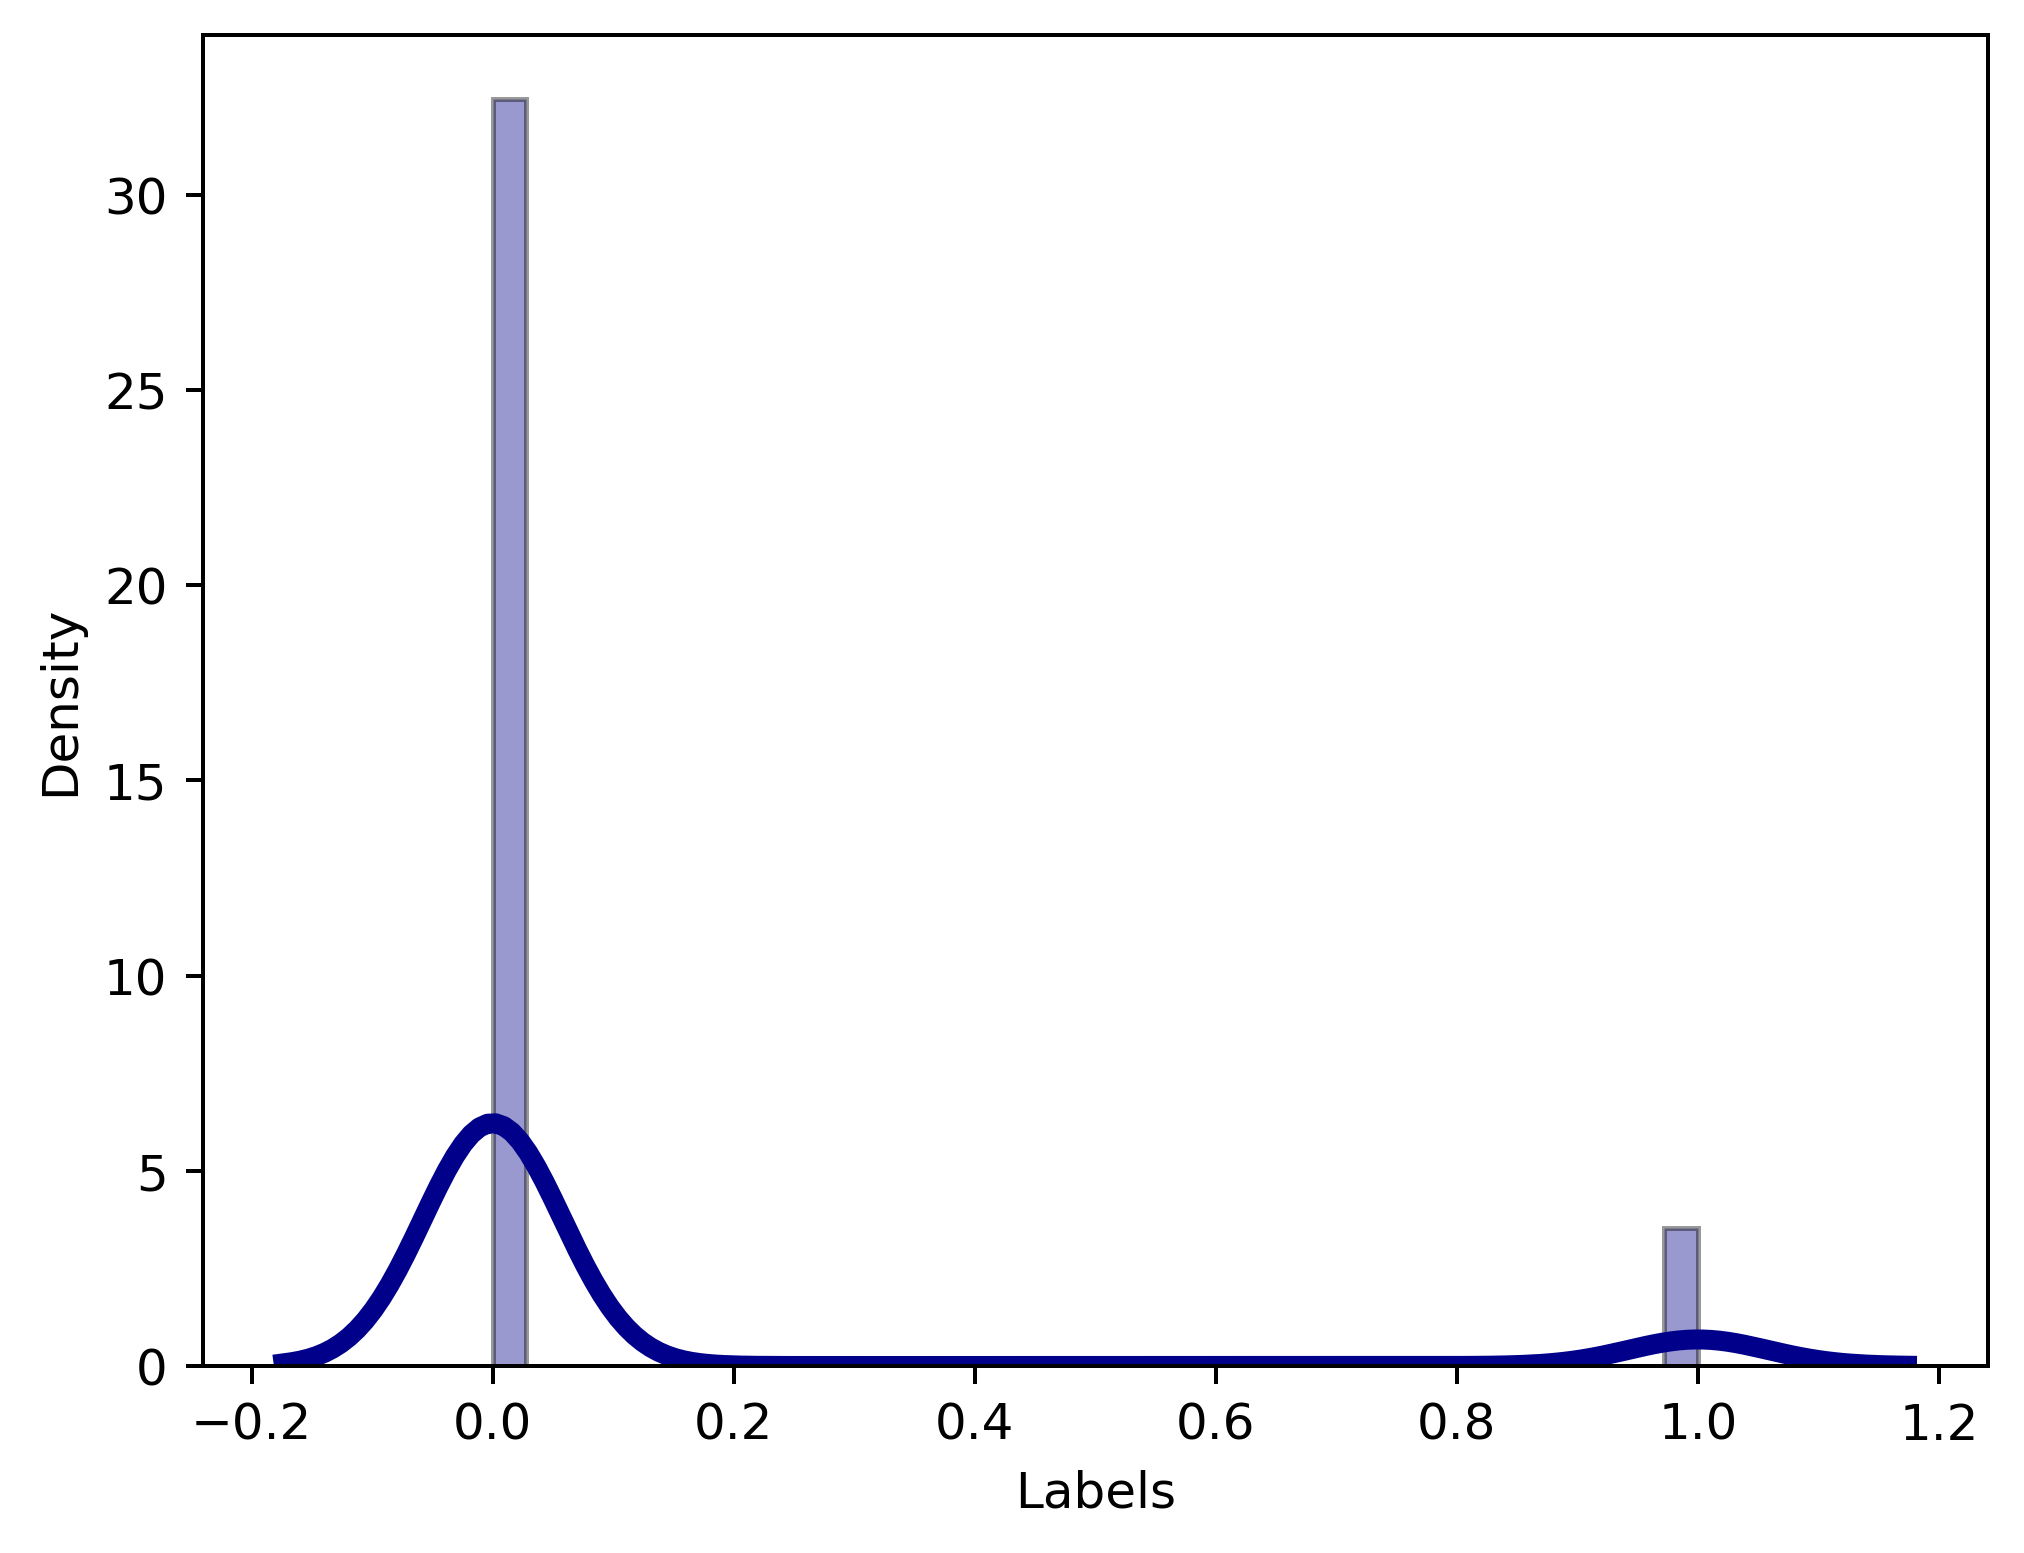

In [24]:
sns.distplot(data['Labels'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [25]:
spam_comment = data[data["Labels"]==1]
spam_comment

,CleanName,CleanComment,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment,Username,Comment
10,flynn mclennan,pewdiepie sub mrbest,1,14,20,2,3,flynn mclennan,pewdiepie sub mrbest
25,dessenhos anima fofa,mrbeast better better better better better bet...,1,20,505,3,72,dessenhos anima fofa,mrbeast better better better better better bet...
37,marcus,piewdipie dantdm like dantdm subscribe piewdipie,1,6,48,1,6,marcus,piewdipie dantdm like dantdm subscribe piewdipie
112,sub challenge video,nice,1,19,4,3,1,sub challenge video,nice
132,beautiful way,know famous youtuber world pewdiepie subscribe...,1,13,55,2,7,beautiful way,know famous youtuber world pewdiepie subscribe...
...,...,...,...,...,...,...,...,...,...
4961,FreeGiftsNow456,Congratulations! You've won a free trip to an ...,1,15,87,1,18,freegiftsnow,congratulations free trip exotic destination c...
4962,MoneyDoublingScheme789,Double your money in just 24 hours! Join our e...,1,22,97,1,17,moneydoublingscheme,double money hours join exclusive investment p...
4963,InstantWeightLoss123,Lose weight instantly with our magical weight ...,1,20,96,1,19,instantweightloss,lose weight instantly magical weight loss pill...
4964,MoneyBackGuarantee123,100% money-back guarantee on all purchases. Sh...,1,21,82,1,14,moneybackguarantee,money back guarantee purchase shop confidence ...


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re, string, unicodedata
import nltk
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# SMOTE
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [27]:
data.head()

,CleanName,CleanComment,Labels,char_lenName,char_lenComment,word_lenName,word_lenComment,Username,Comment
0,lucas marcos capasso,bro pls need antikx comment,0,20,27,3,5,lucas marcos capasso,bro pls need antikx comment
1,sleepybim,try make video accidentally make jerma,0,9,38,1,6,sleepybim,try make video accidentally make jerma
2,mtacrdipo,holly shit somebody else still use quot quot f...,0,9,73,1,13,mtacrdipo,holly shit somebody else still use quot quot f...
4,spr kogkreativitet,jeg elsker deg,0,18,14,2,3,spr kogkreativitet,jeg elsker deg
5,cat bus record,best segway add exist far,0,14,25,3,5,cat bus record,best segway add exist far


In [28]:
data['Labels'].value_counts()

0    3285
1     359
Name: Labels, dtype: int64

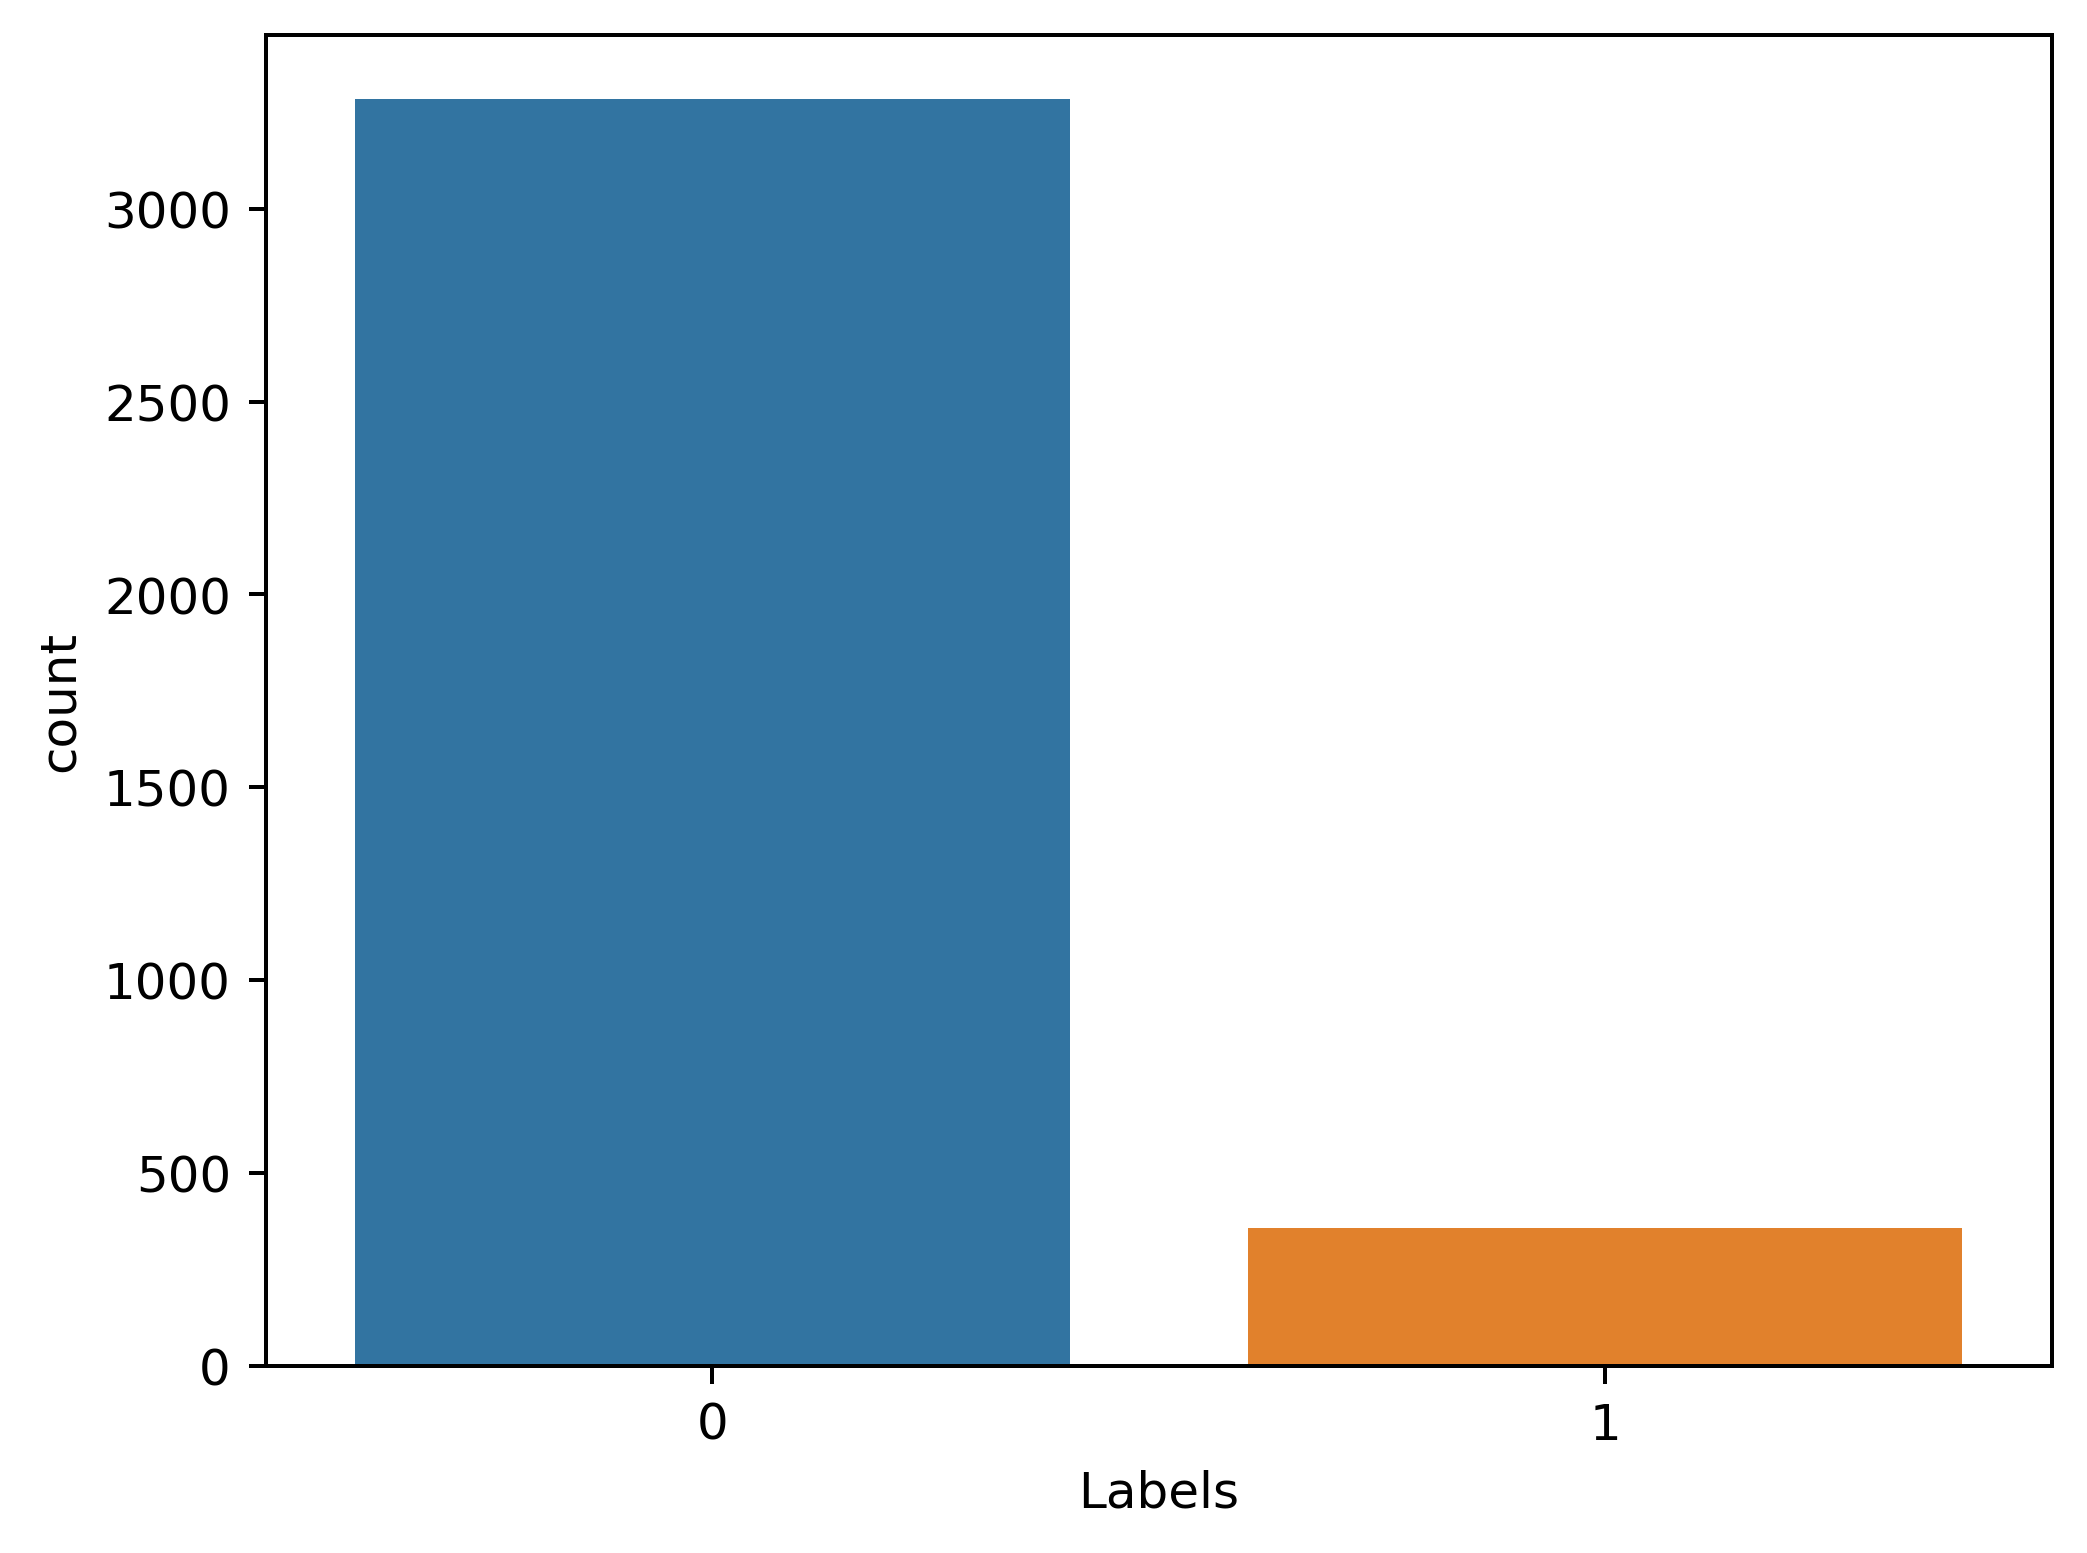

In [29]:
sns.countplot(x = "Labels", data = data)
plt.rcParams["figure.dpi"] = 360

In [30]:
ham = data[data['Labels'] == 0]
ham_count = ham['Comment'].str.split().str.len()
ham_count.index = ham_count.index.astype(str) + ' words:'
ham_count.sort_index(inplace=True)

In [31]:
spam = data[data['Labels'] == 1]
spam_count = spam['Comment'].str.split().str.len()
spam_count.index = spam_count.index.astype(str) + ' words:'
spam_count.sort_index(inplace=True)

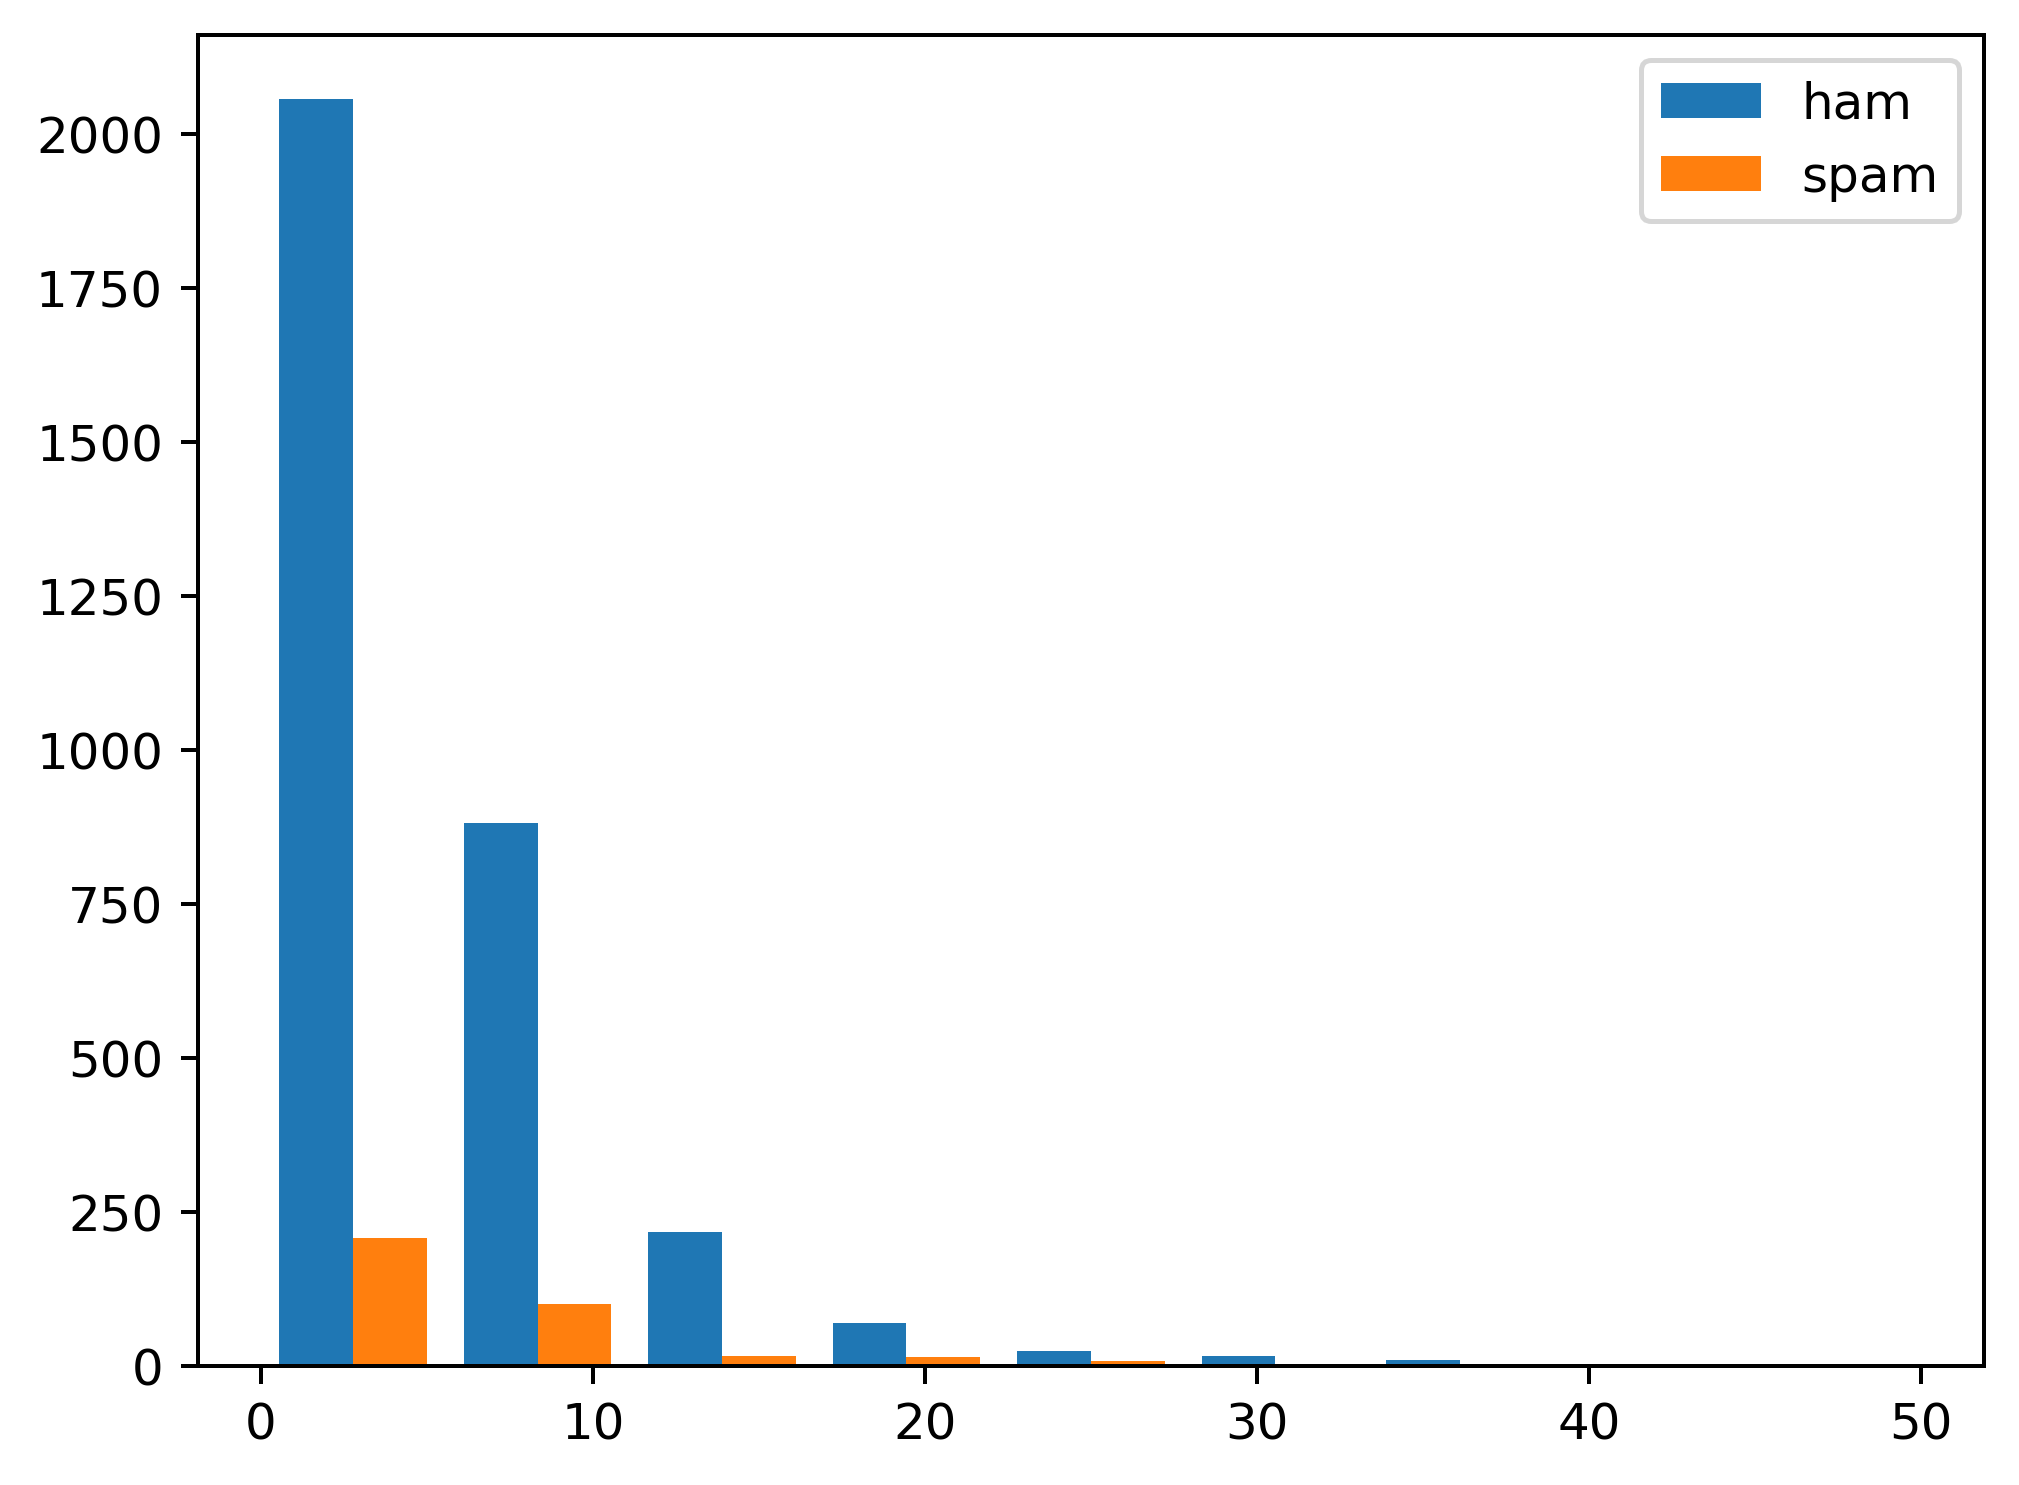

In [32]:
bins = np.linspace(0, 50, 10)
plt.rcParams["figure.dpi"] = 360
plt.hist([ham_count, spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

In [33]:
char_len_check = data.iloc[:, 1].values

### Pre-Processing

In [34]:
len(data)

3644

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data[['Comment', 'Username']], data['Labels'], test_size=0.5, random_state=42)

# Handling Imbalanced Data

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)

# oversampling
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
print(f"Oversampled: {Counter(y_train_over)}")

# undersampling
X_train_ou, y_train_ou = under.fit_resample(X_train_over, y_train_over)
print(f"Combined Random Sampling: {Counter(y_train_ou)}")

Oversampled: Counter({0: 1637, 1: 982})
Combined Random Sampling: Counter({0: 1227, 1: 982})


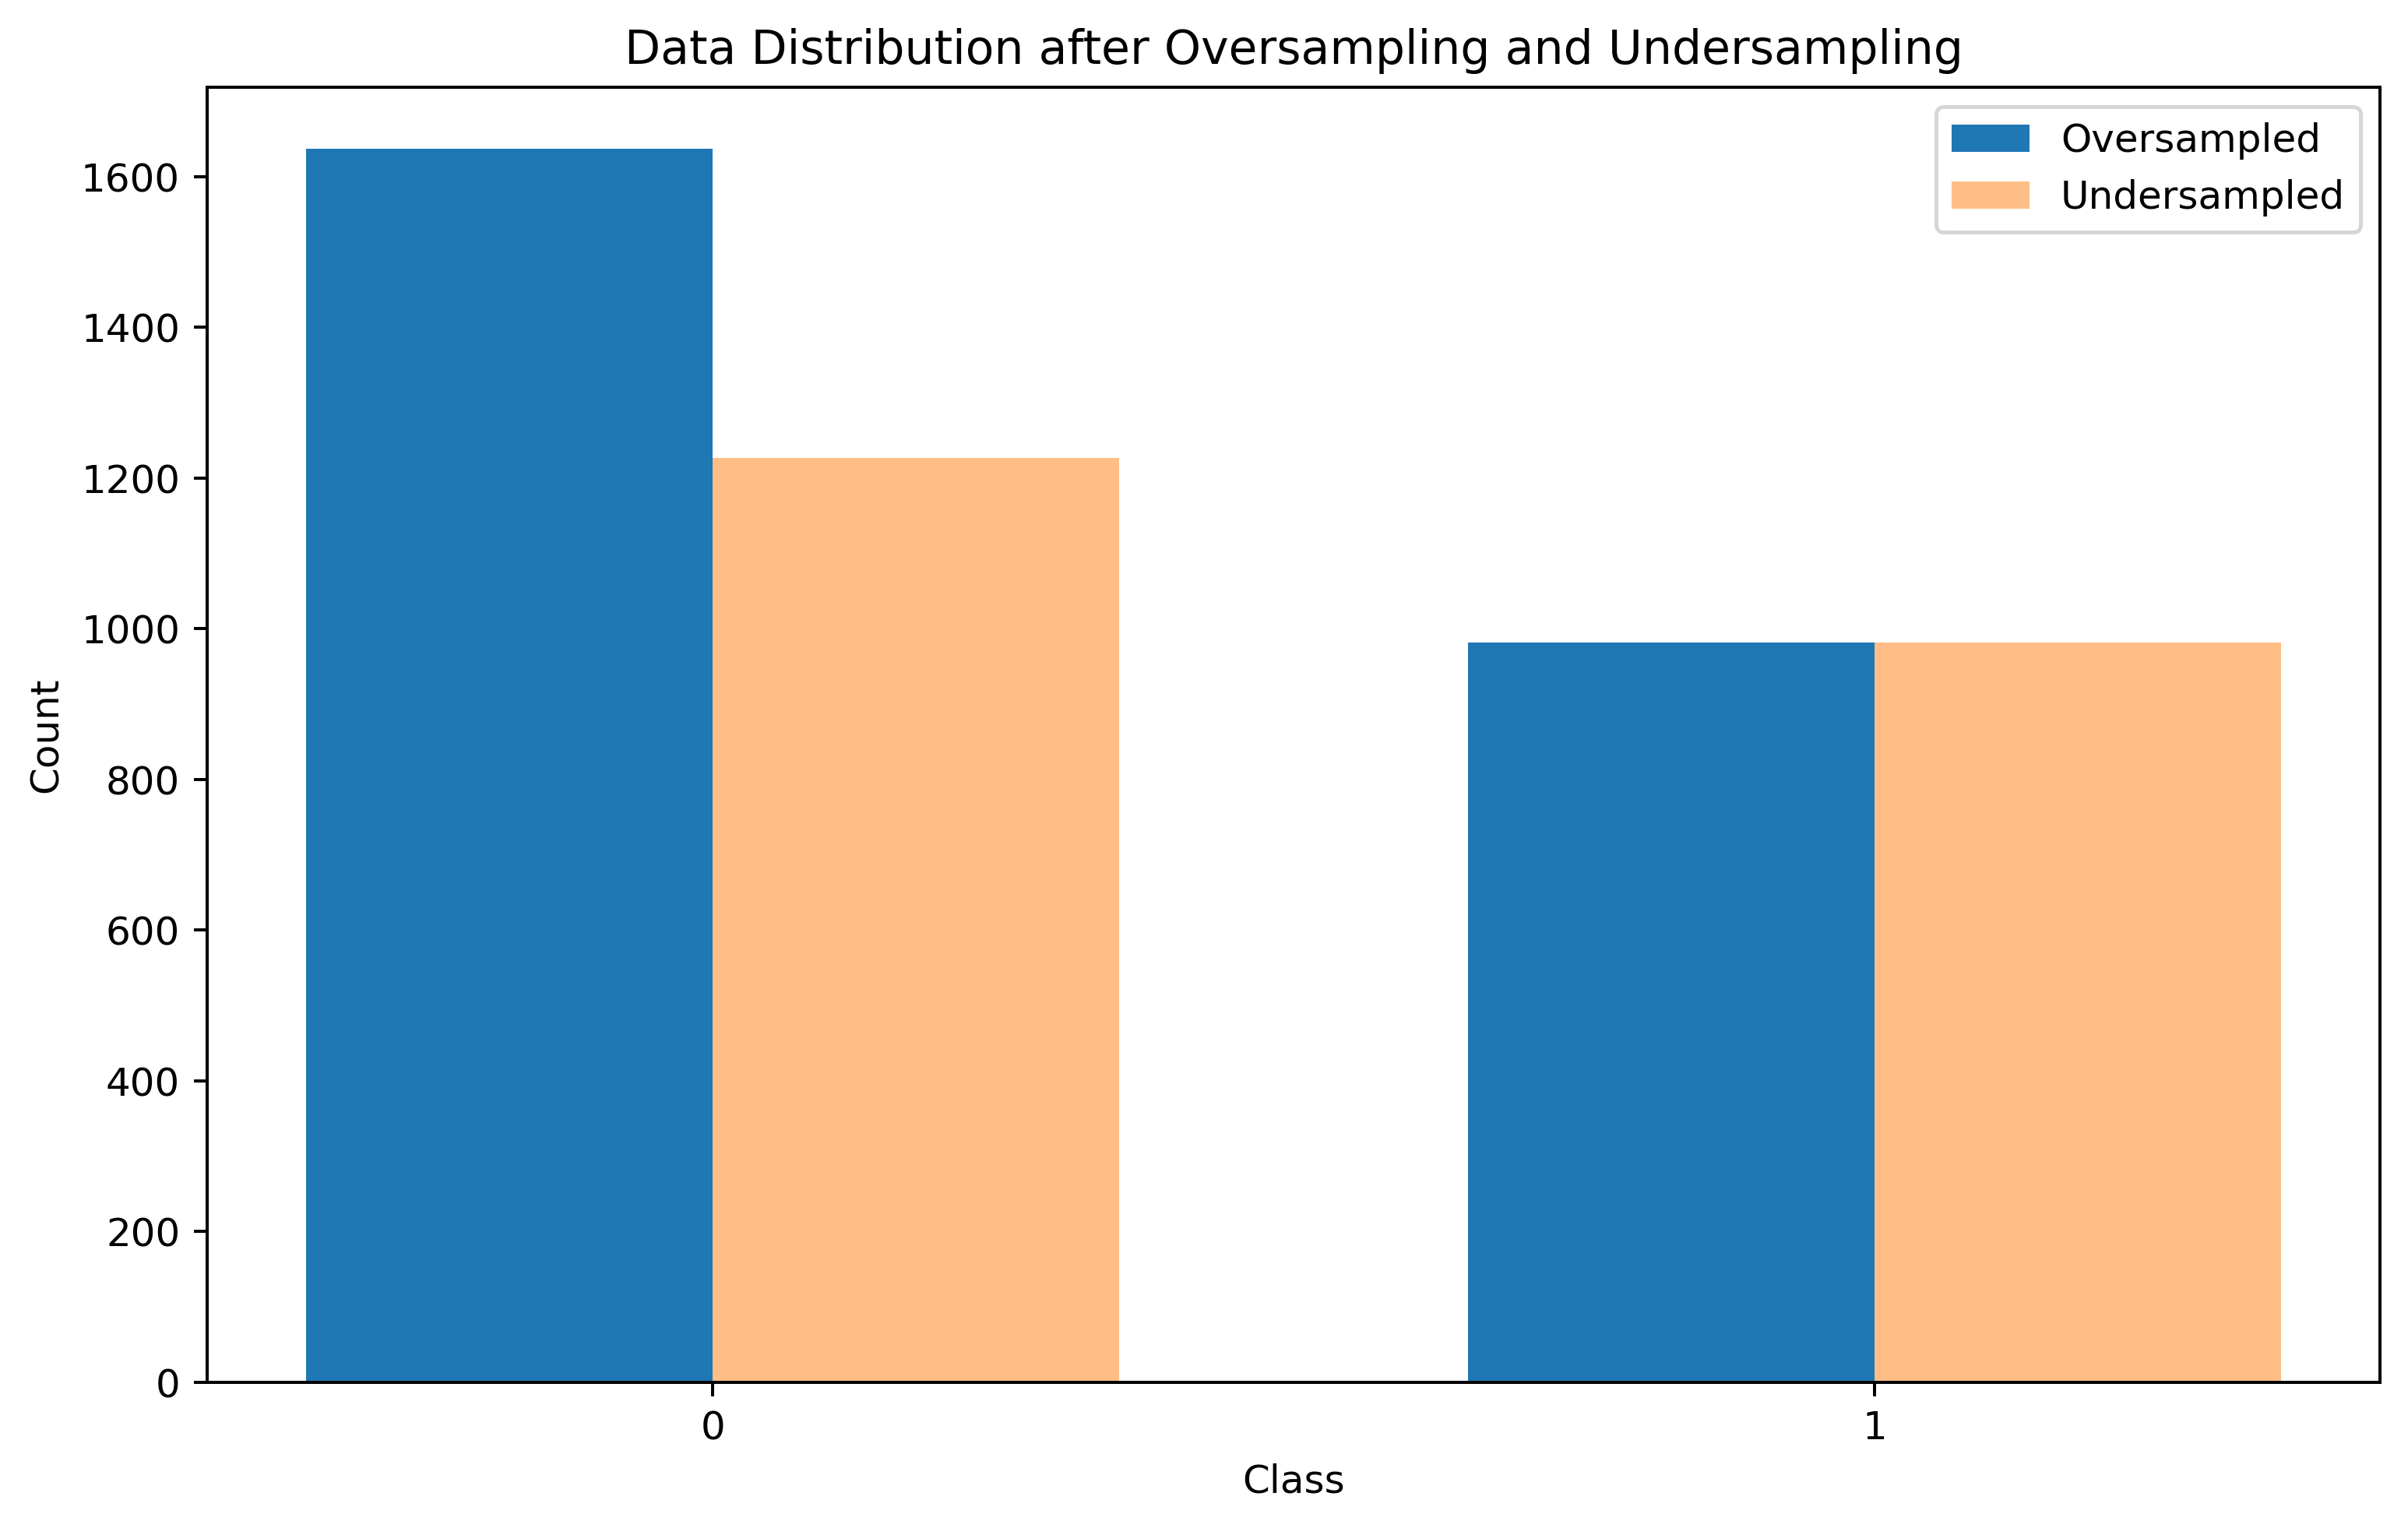

In [37]:
import numpy as np
import matplotlib.pyplot as plt

counter_over = Counter(y_train_over)
counter_under = Counter(y_train_ou)

classes = list(counter_over.keys())

counts_over = [counter_over[class_] for class_ in classes]
counts_under = [counter_under[class_] for class_ in classes]

bar_width = 0.35

x_over = np.arange(len(classes))
x_under = x_over + bar_width

plt.figure(figsize=(10, 6))
plt.bar(x_over, counts_over, width=bar_width, label='Oversampled')
plt.bar(x_under, counts_under, width=bar_width, alpha=0.5, label='Undersampled')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution after Oversampling and Undersampling')
plt.xticks(x_over + bar_width/2, classes)
plt.legend()
plt.show()

# Feature Extraction

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_comment_train_tfidf = tfidf_vectorizer.fit_transform(X_train_ou['Comment'])
X_comment_test_tfidf = tfidf_vectorizer.transform(X_test['Comment'])
X_username_train_tfidf = tfidf_vectorizer.transform(X_train_ou['Username'])
X_username_test_tfidf = tfidf_vectorizer.transform(X_test['Username'])

In [39]:
# Combine comment and username features
X_train_combined = np.concatenate((X_comment_train_tfidf.toarray(), X_username_train_tfidf.toarray()), axis=1)
X_test_combined = np.concatenate((X_comment_test_tfidf.toarray(), X_username_test_tfidf.toarray()), axis=1)

In [40]:
print("Jumlah baris dalam data komentar:", X_comment_train_tfidf.shape[0])
print("Jumlah baris dalam data username:", X_username_train_tfidf.shape[0])


Jumlah baris dalam data komentar: 2209
Jumlah baris dalam data username: 2209


In [41]:
indeks_yang_ditampilkan = [0, 1, 2, 3]

print("Data Sebelum TF-IDF:")
data_sebelum_tfidf = X_train_ou[['Username', 'Comment']].iloc[indeks_yang_ditampilkan]
print(data_sebelum_tfidf)

vektor_komentar = []
vektor_username = []

for i, (row, col) in enumerate(zip(*X_comment_train_tfidf.toarray().nonzero())):
    if i in indeks_yang_ditampilkan:
        value = X_comment_train_tfidf.toarray()[row, col]
        vektor_komentar.append(f"({row}, {col})\t{value}")

for i, (row, col) in enumerate(zip(*X_username_train_tfidf.toarray().nonzero())):
    if i in indeks_yang_ditampilkan:
        value = X_username_train_tfidf.toarray()[row, col]
        vektor_username.append(f"({row}, {col})\t{value}")

print("\nRepresentasi Vektor Setelah TF-IDF:")
for i in range(len(indeks_yang_ditampilkan)):
    print(f"{data_sebelum_tfidf.iloc[i]['Username']} - {data_sebelum_tfidf.iloc[i]['Comment']}")
    print(f"   Vektor Username: {vektor_username[i]}")
    print(f"   Vektor Komentar: {vektor_komentar[i]}\n")


Data Sebelum TF-IDF:
            Username                                            Comment
0  theinternetlawyer  ladies gentlemen href https www youtube com wa...
1                sca                               glad watch pewdiepie
2      darkcastleboy               thank last nightmares girl scary asf
3            howwwlx                                          love yeat

Representasi Vektor Setelah TF-IDF:
theinternetlawyer - ladies gentlemen href https www youtube com watch wbniggluae amp irish markiplier href https www youtube com watch wbniggluae amp michael jackson incarnate
   Vektor Username: (11, 381)	1.0
   Vektor Komentar: (0, 75)	0.26407988180954456

sca - glad watch pewdiepie
   Vektor Username: (14, 321)	1.0
   Vektor Komentar: (0, 391)	0.2204974339988433

darkcastleboy - thank last nightmares girl scary asf
   Vektor Username: (25, 828)	1.0
   Vektor Komentar: (0, 847)	0.2828653031911368

howwwlx - love yeat
   Vektor Username: (26, 509)	1.0
   Vektor Komentar: (0,

# Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=40)
X_train_selected = selector.fit_transform(X_train_combined, y_train_ou)
X_test_selected = selector.transform(X_test_combined)

selected_feature_indices = selector.get_support(indices=True)
feature_names_comment = tfidf_vectorizer.get_feature_names_out()
feature_names_username = tfidf_vectorizer.get_feature_names_out()
selected_feature_names = np.concatenate((feature_names_comment, feature_names_username))[selected_feature_indices]

print("Selected Features:")
for feature in selected_feature_names:
    print(feature)


Selected Features:
bot
bro
channel
check
facebook
famous
first
free
gofundme
href
http
human
lol
love
name
pewds
please
plz
quest
quot
read
song
sub
subscribe
subscribers
textme
watch
wbniggluae
youtube
dont
pewdiepie
picture
profile
read
real
sea
sub
tayara
video
wing


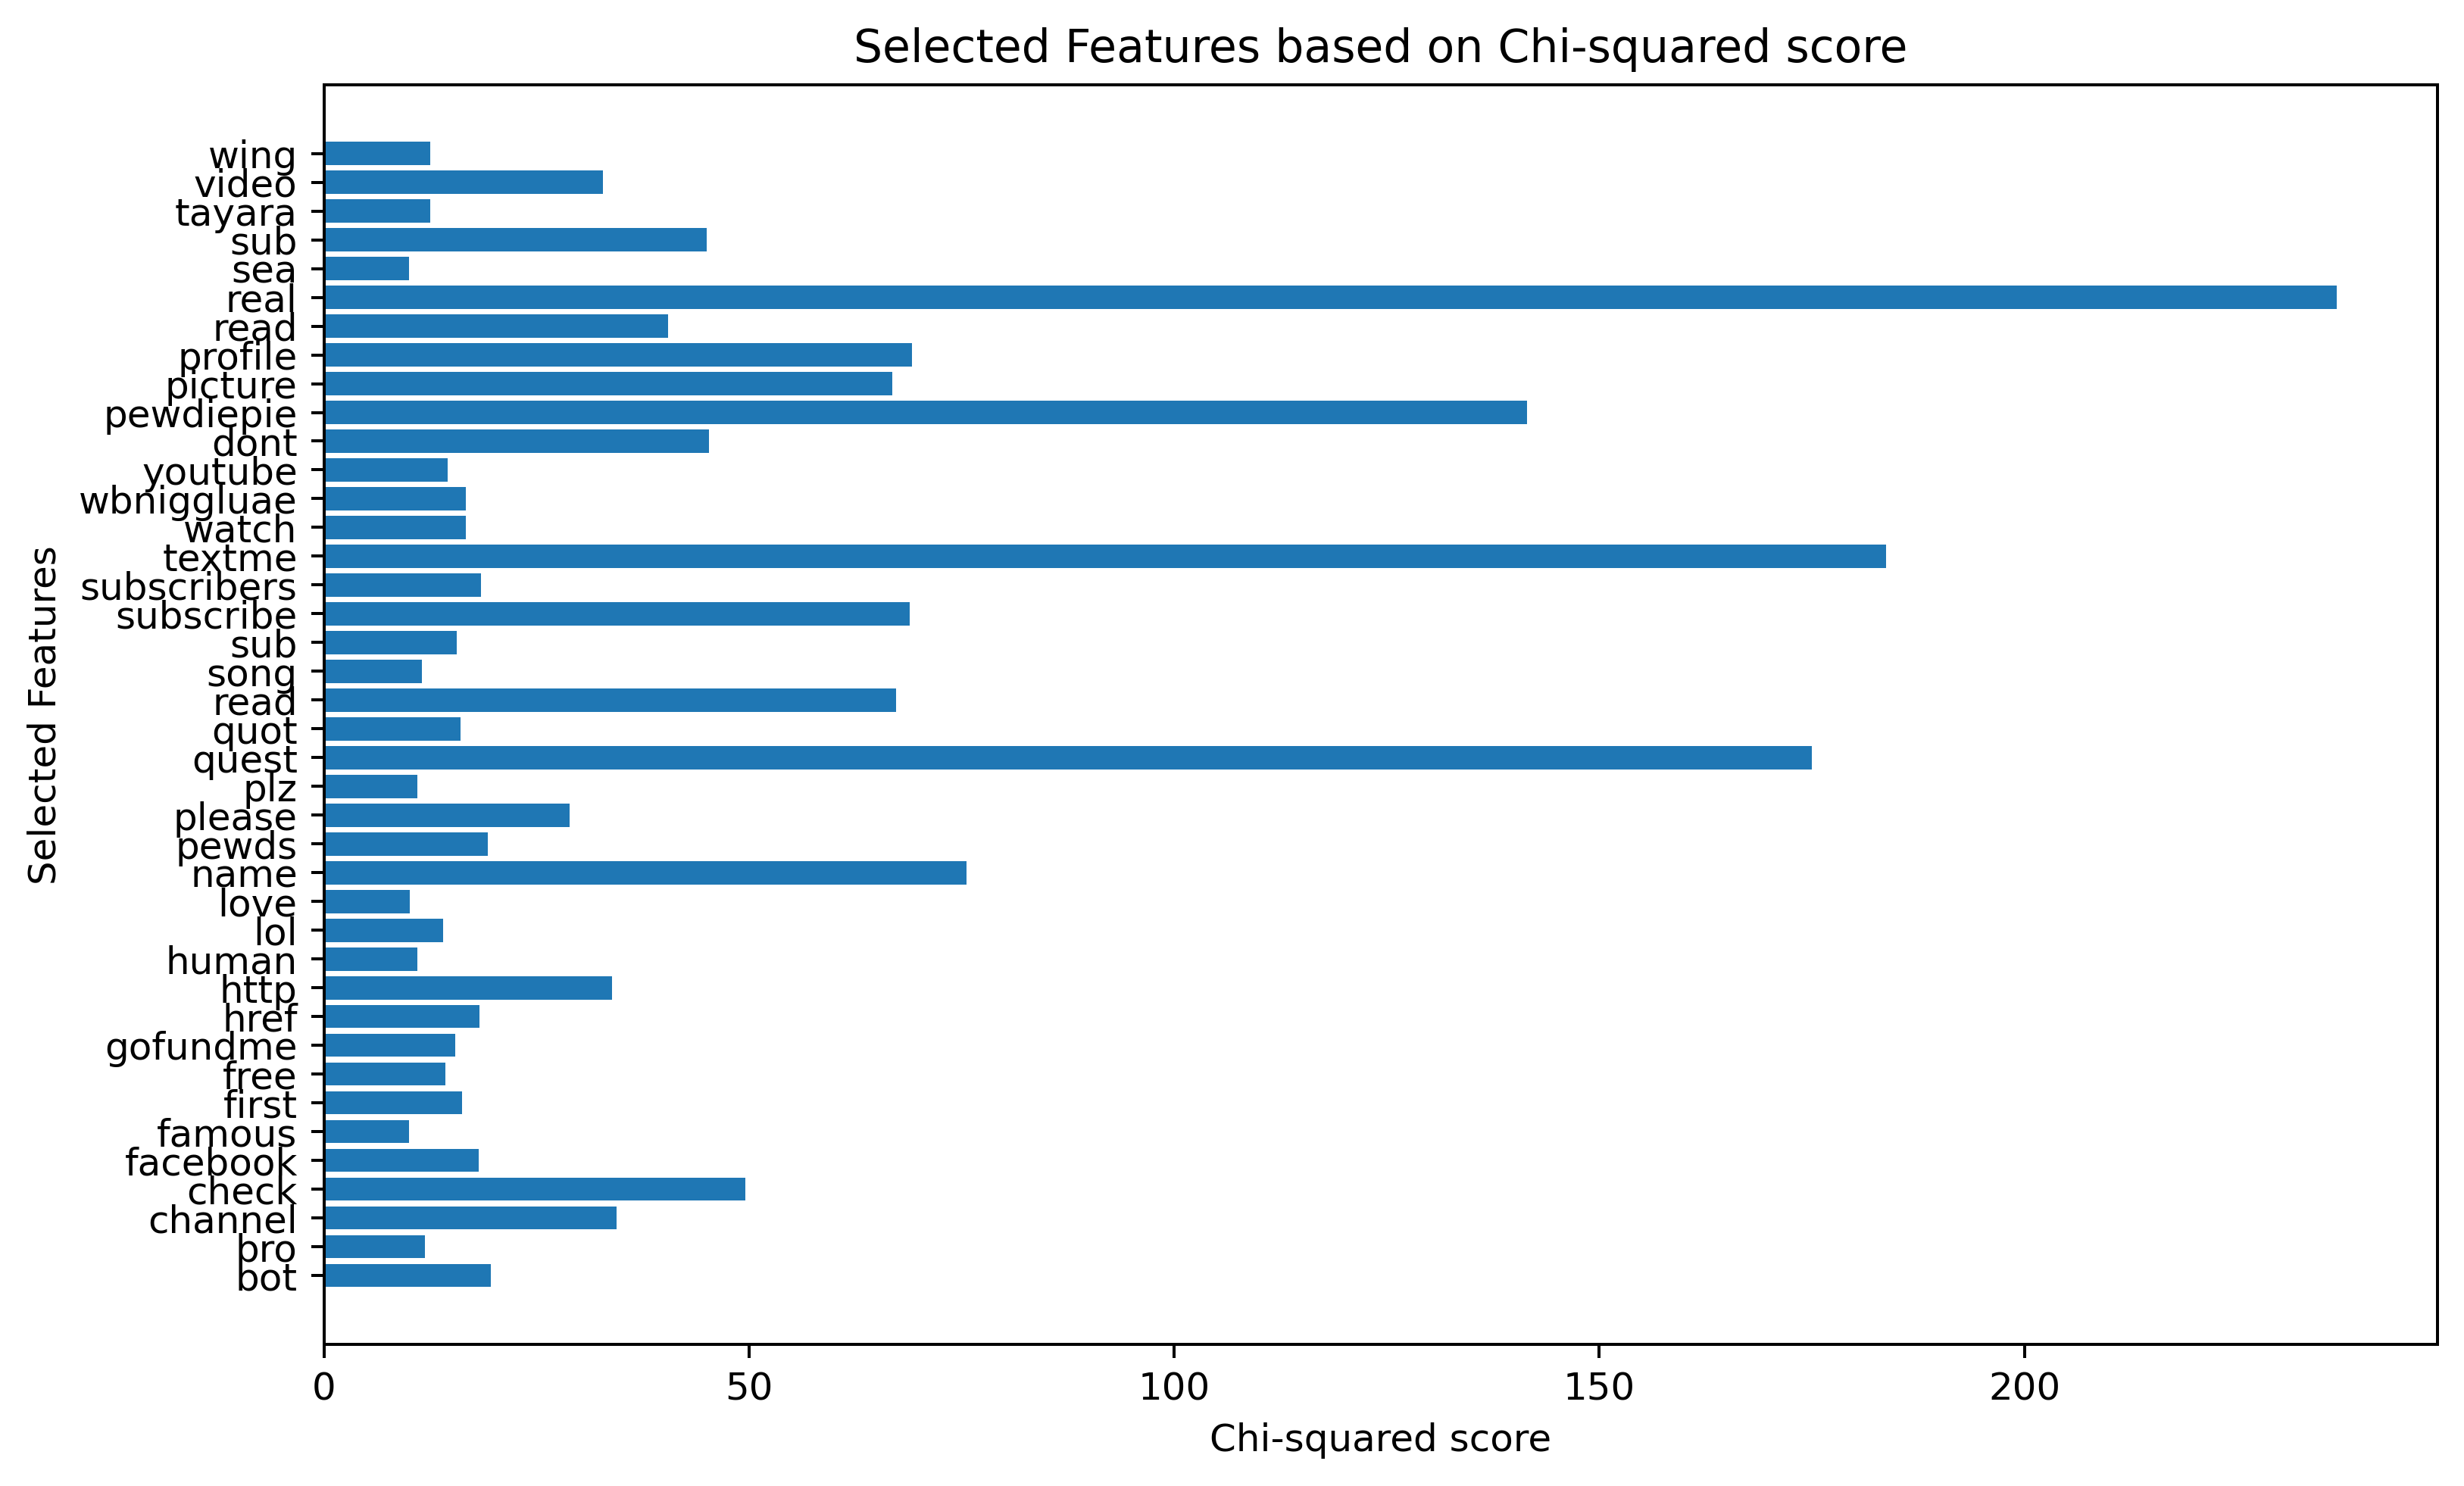

In [43]:
import matplotlib.pyplot as plt

scores = selector.scores_

plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_feature_names)), scores[selected_feature_indices])
plt.yticks(range(len(selected_feature_names)), selected_feature_names)
plt.xlabel('Chi-squared score')
plt.ylabel('Selected Features')
plt.title('Selected Features based on Chi-squared score')
plt.show()


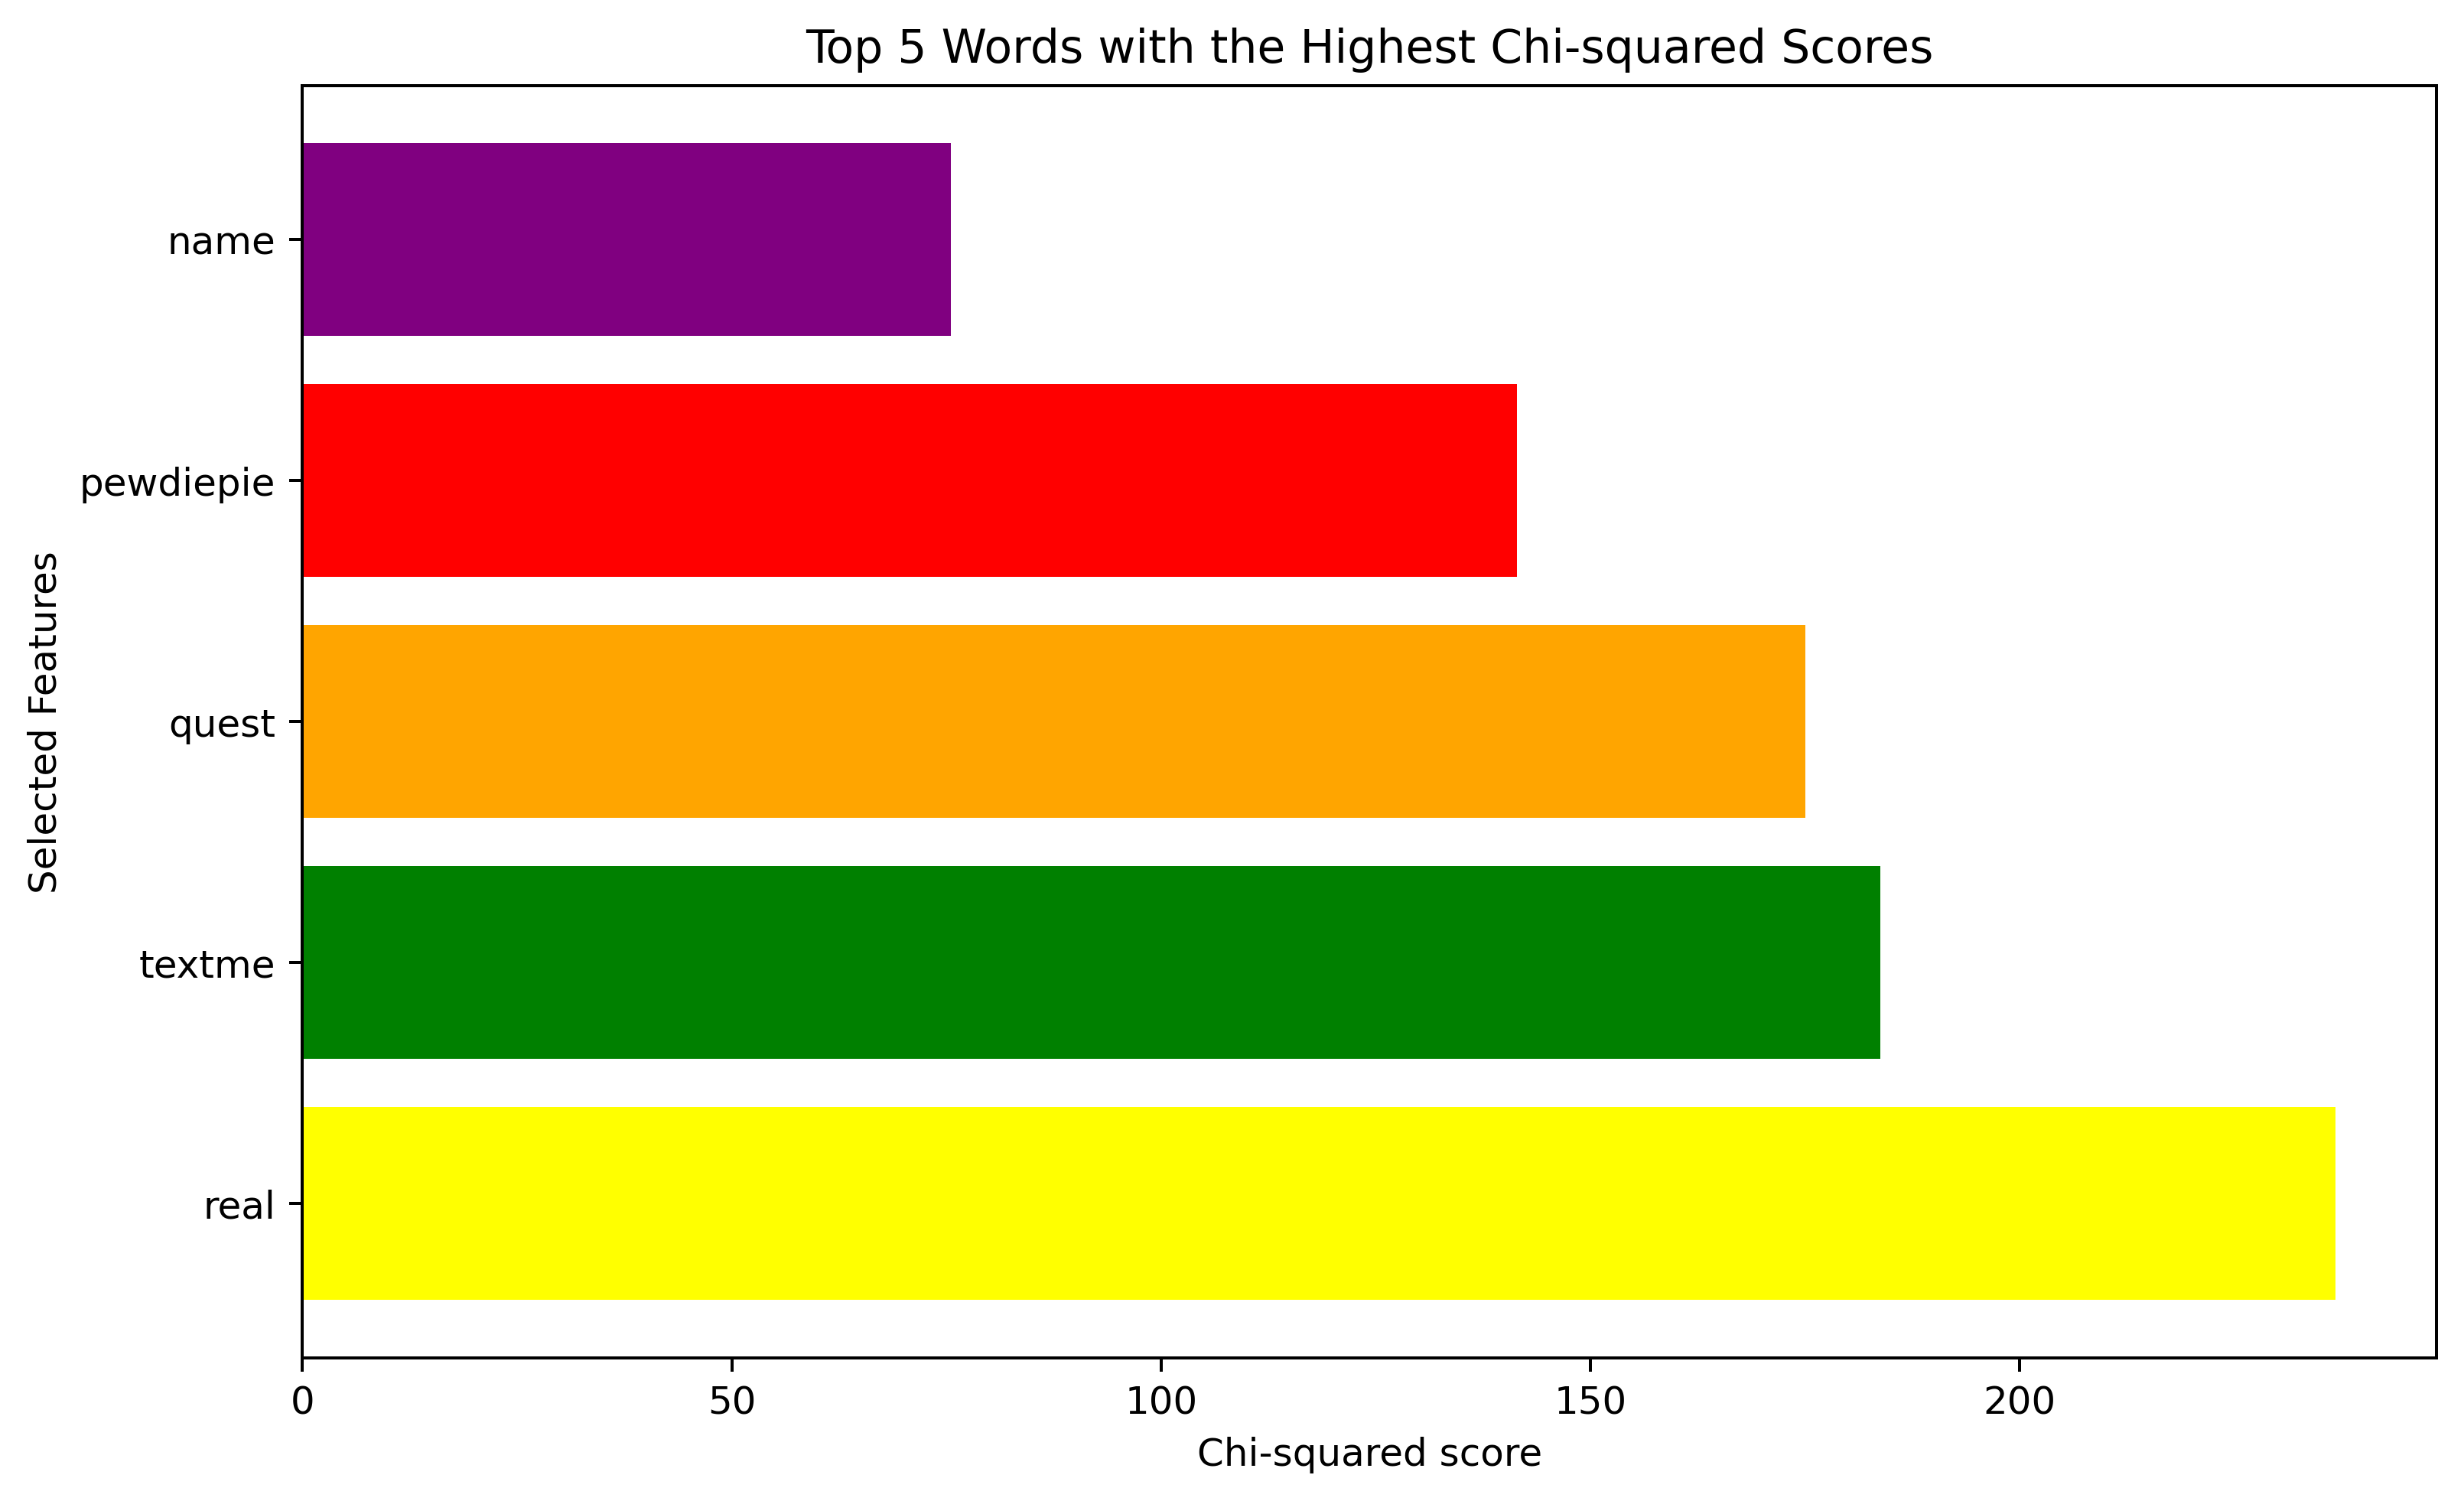

In [46]:
sorted_indices = np.argsort(scores[selected_feature_indices])[::-1]
top_5_indices = sorted_indices[:5]

top_5_feature_names = selected_feature_names[top_5_indices]
top_5_scores = scores[selected_feature_indices][top_5_indices]

colors = ['yellow', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_5_feature_names)), top_5_scores, color=colors)
plt.yticks(range(len(top_5_feature_names)), top_5_feature_names)
plt.xlabel('Chi-squared score')
plt.ylabel('Selected Features')
plt.title('Top 5 Words with the Highest Chi-squared Scores')

plt.show()

### Model

In [ ]:
import random
from tensorflow.keras import regularizers

class ANN(tf.keras.models.Sequential):
    def __init__(self, child_weights=None):
        super().__init__()

        if child_weights is None:
            layer1 = Dense(100, input_shape=(40,), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.1))
            dropout1 = Dropout(0.5)
            layer2 = Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.1))
            dropout2 = Dropout(0.5)
            layer3 = Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.1))
            dropout3 = Dropout(0.5)
            layer4 = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')
            self.add(layer1)
            self.add(dropout1)
            self.add(layer2)
            self.add(dropout2)
            self.add(layer3)
            self.add(dropout3)
            self.add(layer4)
            self.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        else:
            self.add(
                Dense(
                    100,
                    input_shape=(40,),
                    activation='relu',
                    kernel_initializer='he_uniform',
                    weights=[child_weights[0], np.ones(100)])
                )
            self.add(
                Dense(
                    64,
                    activation='relu',
                    kernel_initializer='he_uniform',
                    weights=[child_weights[1], np.zeros(64)])
            )
            self.add(
                Dense(
                    64,
                    activation='relu',
                    kernel_initializer='he_uniform',
                    weights=[child_weights[2], np.zeros(64)])
            )
            self.add(
                Dense(
                    1,
                    activation='sigmoid',
                    kernel_initializer='glorot_uniform',
                    weights=[child_weights[3], np.zeros(1)])
            )
            self.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    def forward_propagation(self, train_features, train_labels):
        self.fit(train_features, train_labels, epochs=5, verbose=1)  # You can adjust epochs as needed
        predict_labels = self.predict(train_features)
        self.fitness = accuracy_score(train_labels, np.round(predict_labels))

def crossover(nn1, nn2):
    nn1_weights = [np.copy(layer.get_weights()[0]) for layer in nn1.layers if layer.get_weights()]
    nn2_weights = [np.copy(layer.get_weights()[0]) for layer in nn2.layers if layer.get_weights()]

    child_weights = []

    num_layers = min(len(nn1_weights), len(nn2_weights))
    for i in range(num_layers):
        if nn1_weights[i].shape != nn2_weights[i].shape:
            # If the shapes are not compatible, skip crossover for this layer
            child_weights.append(nn1_weights[i])
            continue

        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        for j in range(split, np.shape(nn1_weights[i])[1]):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        child_weights.append(nn1_weights[i])

    mutation(child_weights)

    child = ANN(child_weights)
    return child

def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut <= .05:
        child_weights[selection] *= random.randint(2, 5)
    else:
        pass


In [ ]:
networks = []
pool = []
# Generation counter
generation = 0
# Initial Population
population = 10
for i in range(population):
    networks.append(ANN())

# Track Max Fitness
max_fitness = 0
# Store Max Fitness Weights
optimal_weights = []

epochs = 10

In [ ]:
for epoch in range(epochs):
    # For each individual in population
    for nn in networks:
        nn.forward_propagation(X_train_selected, y_train_ou)
        if nn.fitness > max_fitness:
            max_fitness = nn.fitness
            optimal_weights = [layer.get_weights()[0] for layer in nn.layers if layer.get_weights()]

    networks.sort(key=lambda x: x.fitness, reverse=True)
    print('Epoch:', epoch, 'Best Fitness:', max_fitness)

    # Breeding
    while len(pool) < population:
          parent1 = random.choice(networks)
          parent2 = random.choice(networks)

          child = crossover(parent1, parent2)
          pool.append(child)

    # Replace Old Generation with New Generation
    networks = pool
    pool = []

Epoch 1/5
70/70 [==============================] - 1s 2ms/step - loss: 33.5812 - accuracy: 0.5994
Epoch 2/5
70/70 [==============================] - 0s 2ms/step - loss: 16.7481 - accuracy: 0.6514
Epoch 3/5
70/70 [==============================] - 0s 3ms/step - loss: 8.3511 - accuracy: 0.5894
Epoch 4/5
70/70 [==============================] - 0s 2ms/step - loss: 4.2537 - accuracy: 0.5595
Epoch 5/5
70/70 [==============================] - 0s 1ms/step
Epoch 1/5
70/70 [==============================] - 2s 4ms/step - loss: 34.1891 - accuracy: 0.6537
Epoch 2/5
70/70 [==============================] - 0s 4ms/step - loss: 17.1034 - accuracy: 0.6854
Epoch 3/5
70/70 [==============================] - 0s 4ms/step - loss: 8.5372 - accuracy: 0.6243
Epoch 4/5
70/70 [==============================] - 0s 3ms/step - loss: 4.3453 - accuracy: 0.5763
Epoch 5/5
70/70 [==============================] - 0s 2ms/step
Epoch 1/5
70/70 [==============================] - 2s 3ms/step - loss: 33.4966 - accuracy: 0.6

In [ ]:
best_model = ANN(optimal_weights)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
best_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = best_model.fit(X_train_selected, y_train_ou, validation_data=(X_test_selected,y_test), epochs=20, verbose=1)

Epoch 1/20
70/70 [==============================] - 2s 8ms/step - loss: 0.2959 - accuracy: 0.9158 - val_loss: 0.2315 - val_accuracy: 0.9654
Epoch 2/20
70/70 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9380 - val_loss: 0.1350 - val_accuracy: 0.9726
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9398 - val_loss: 0.1857 - val_accuracy: 0.9660
Epoch 4/20
70/70 [==============================] - 0s 4ms/step - loss: 0.2029 - accuracy: 0.9339 - val_loss: 0.3538 - val_accuracy: 0.9676
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 0.1889 - accuracy: 0.9344 - val_loss: 0.1609 - val_accuracy: 0.9726
Epoch 6/20
70/70 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.9375 - val_loss: 0.1642 - val_accuracy: 0.9693
Epoch 7/20
70/70 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9393 - val_loss: 0.1417 - val_accuracy: 0.9720
Epoch 8/20
70/70 [==

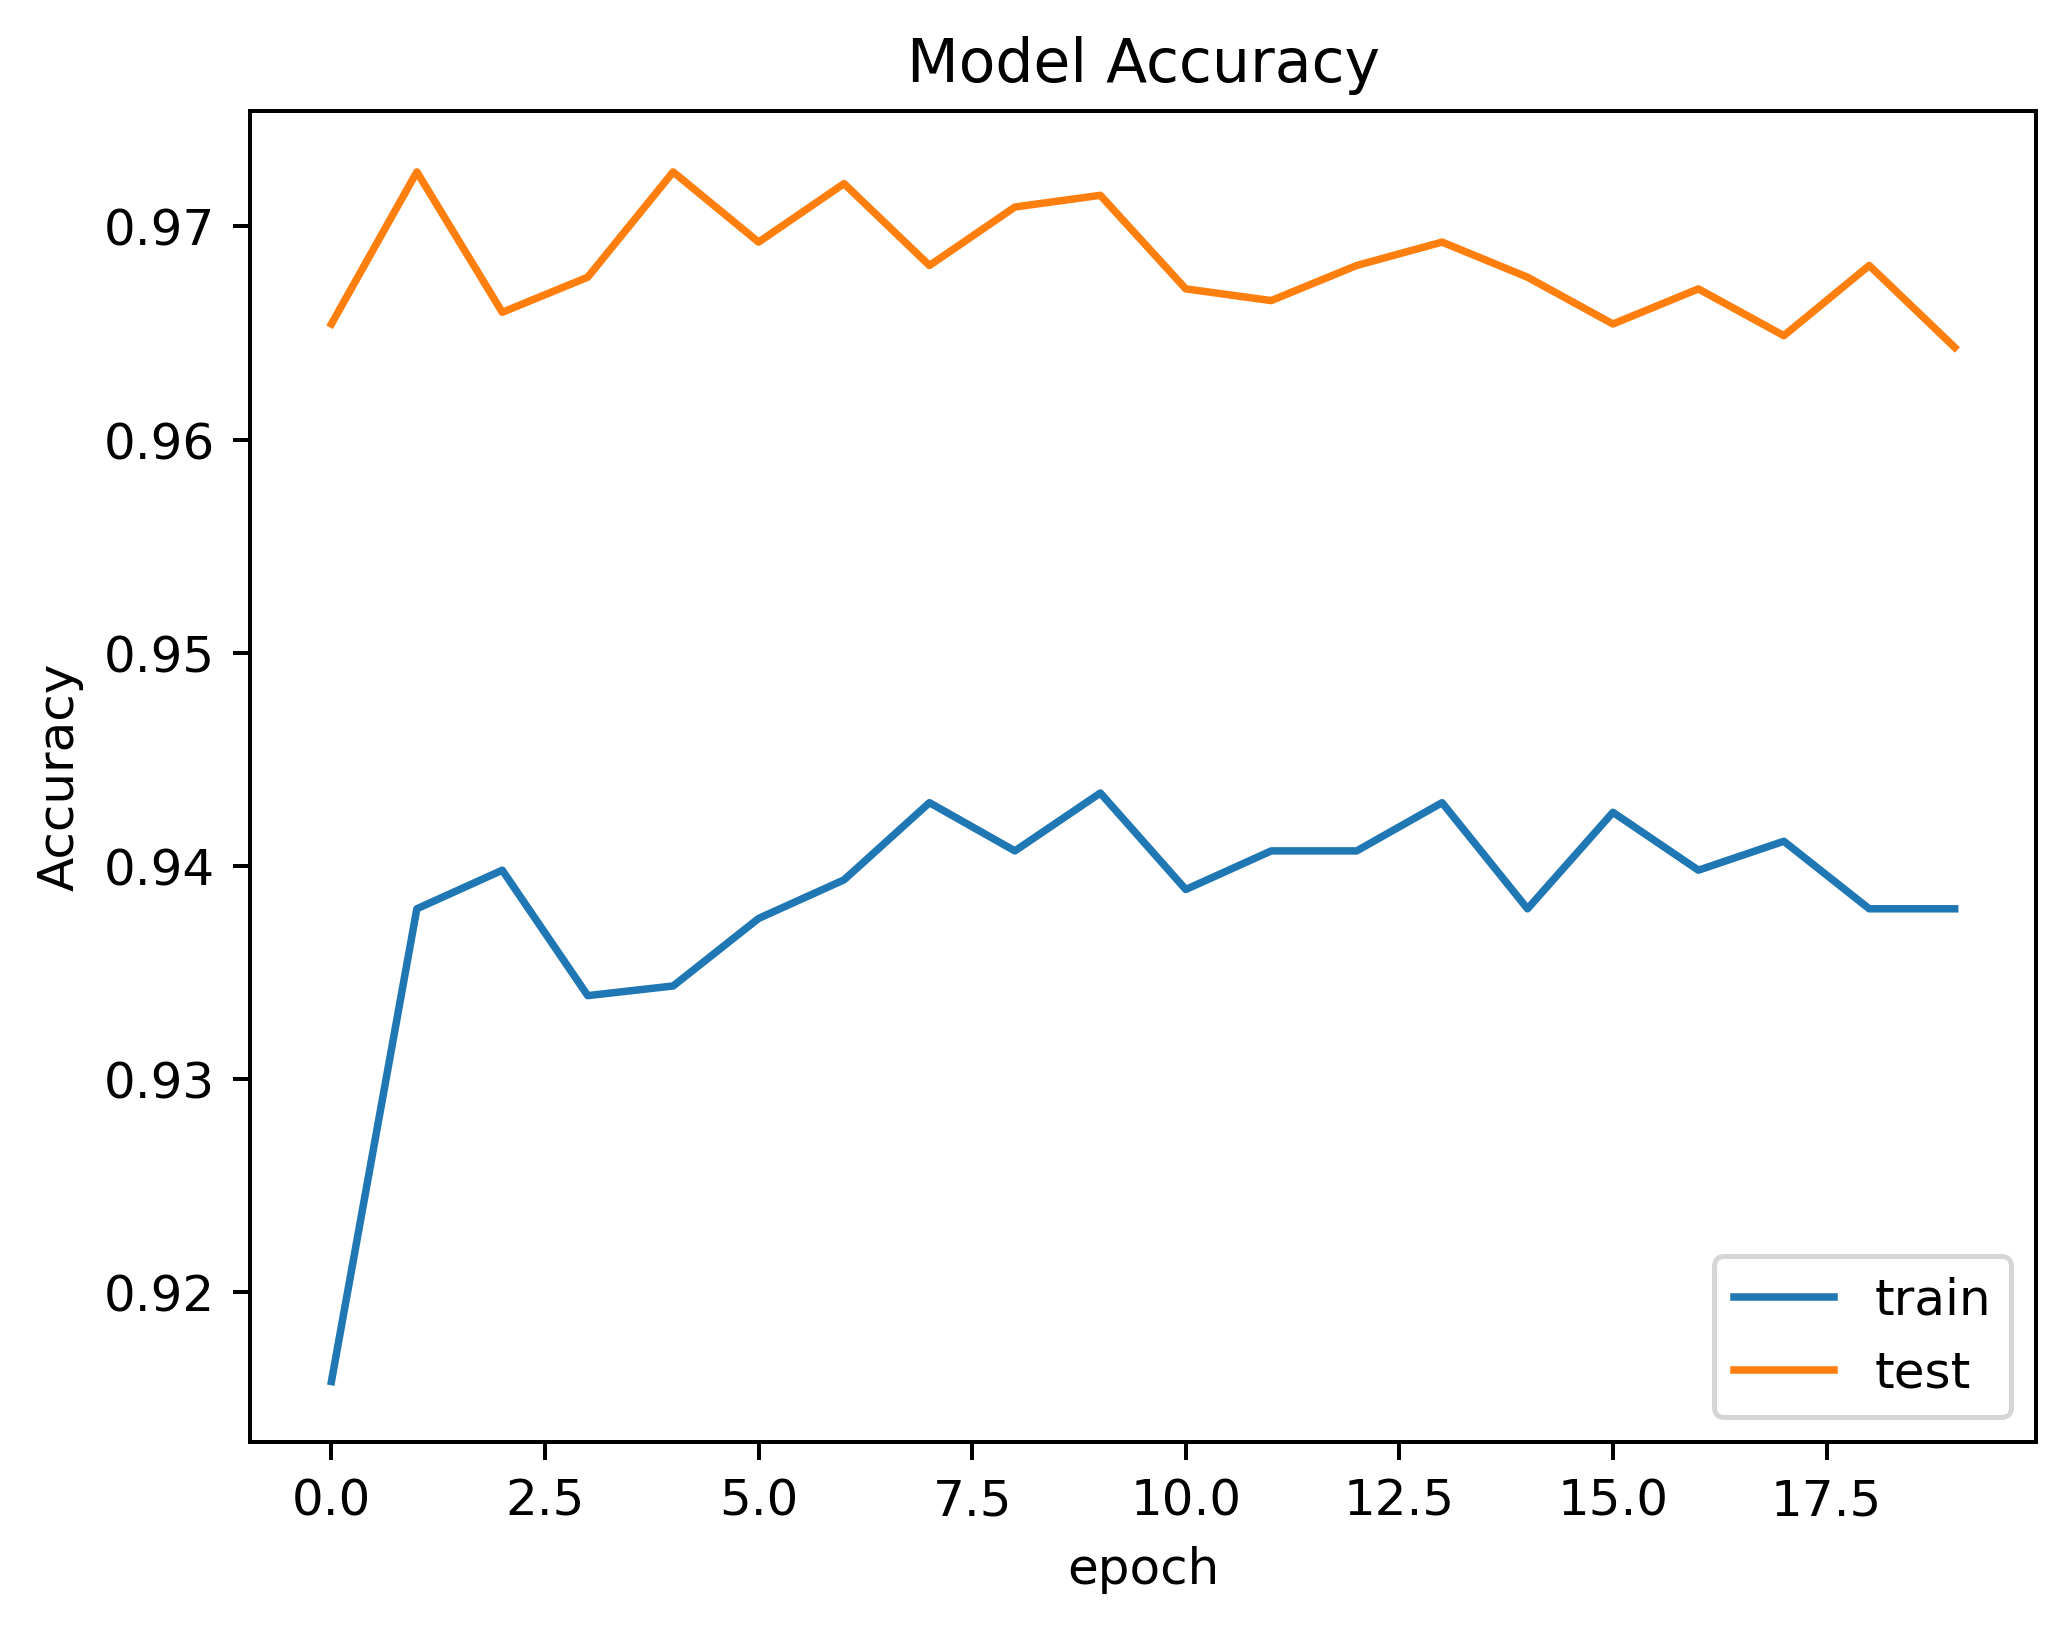

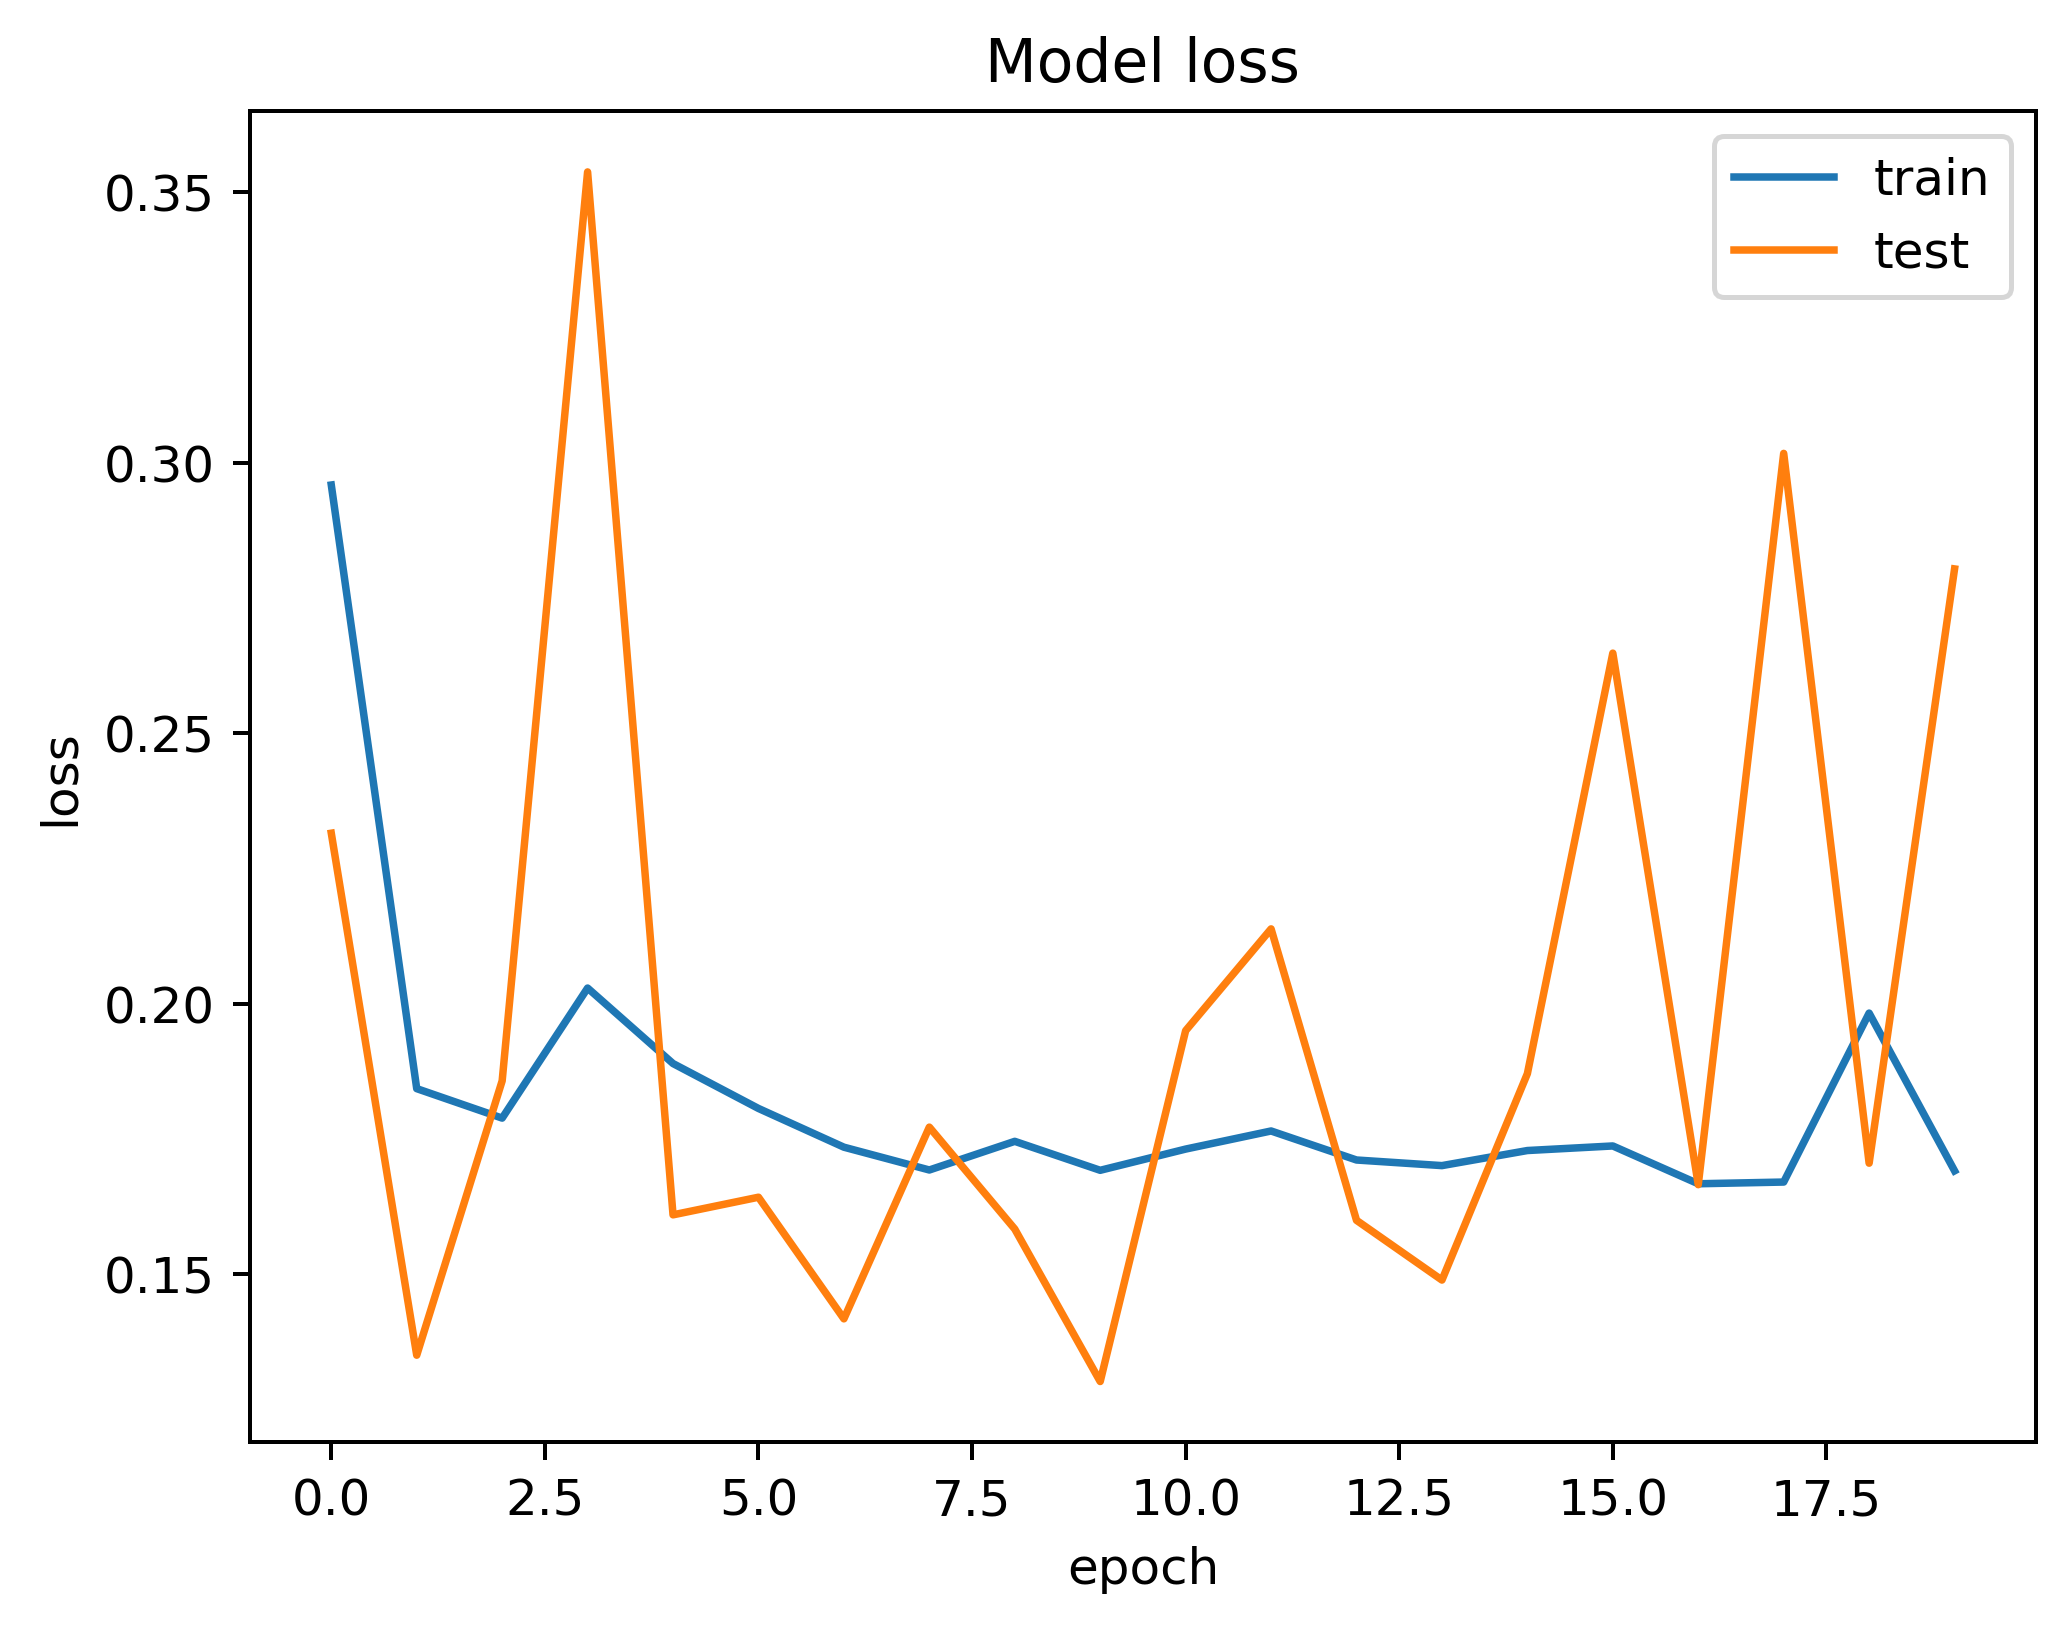

In [ ]:
# summarize history for acc
plt.rcParams["figure.dpi"] = 360
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.rcParams["figure.dpi"] = 360
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
y_pred = best_model.predict(X_test_selected)
y_pred = (y_pred > 0.5)

57/57 [==============================] - 0s 2ms/step


In [ ]:
new_data = pd.DataFrame({"CleanName": ["FreeGiftsNow123", "MoneyFastScheme777"], "CleanComment": ["Congratulations! You've won a free iPhone! Click here to claim your prize www.totallynotspam.com", "Click on my profile and Press that subscribe button"]})

In [ ]:
new_data['Username'] = new_data['CleanName'].apply(lambda x:preprocessing(x))
new_data['Comment'] = new_data['CleanComment'].apply(lambda x:preprocessing(x))
X_comment_new_tfidf = tfidf_vectorizer.transform(new_data['Comment'])
X_username_new_tfidf = tfidf_vectorizer.transform(new_data['Username'])

X_new_combined = np.concatenate((X_comment_new_tfidf.toarray(), X_username_new_tfidf.toarray()), axis=1)

X_new_selected = selector.transform(X_new_combined)

new_pred = best_model.predict(X_new_selected)

1/1 [==============================] - 0s 32ms/step


In [ ]:
new_pred = (new_pred > 0.5)

print(new_pred)

[[ True]
 [ True]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.964324917672887
Precision: 0.7853403141361257
Recall: 0.8620689655172413
F1 Score: 0.8219178082191781


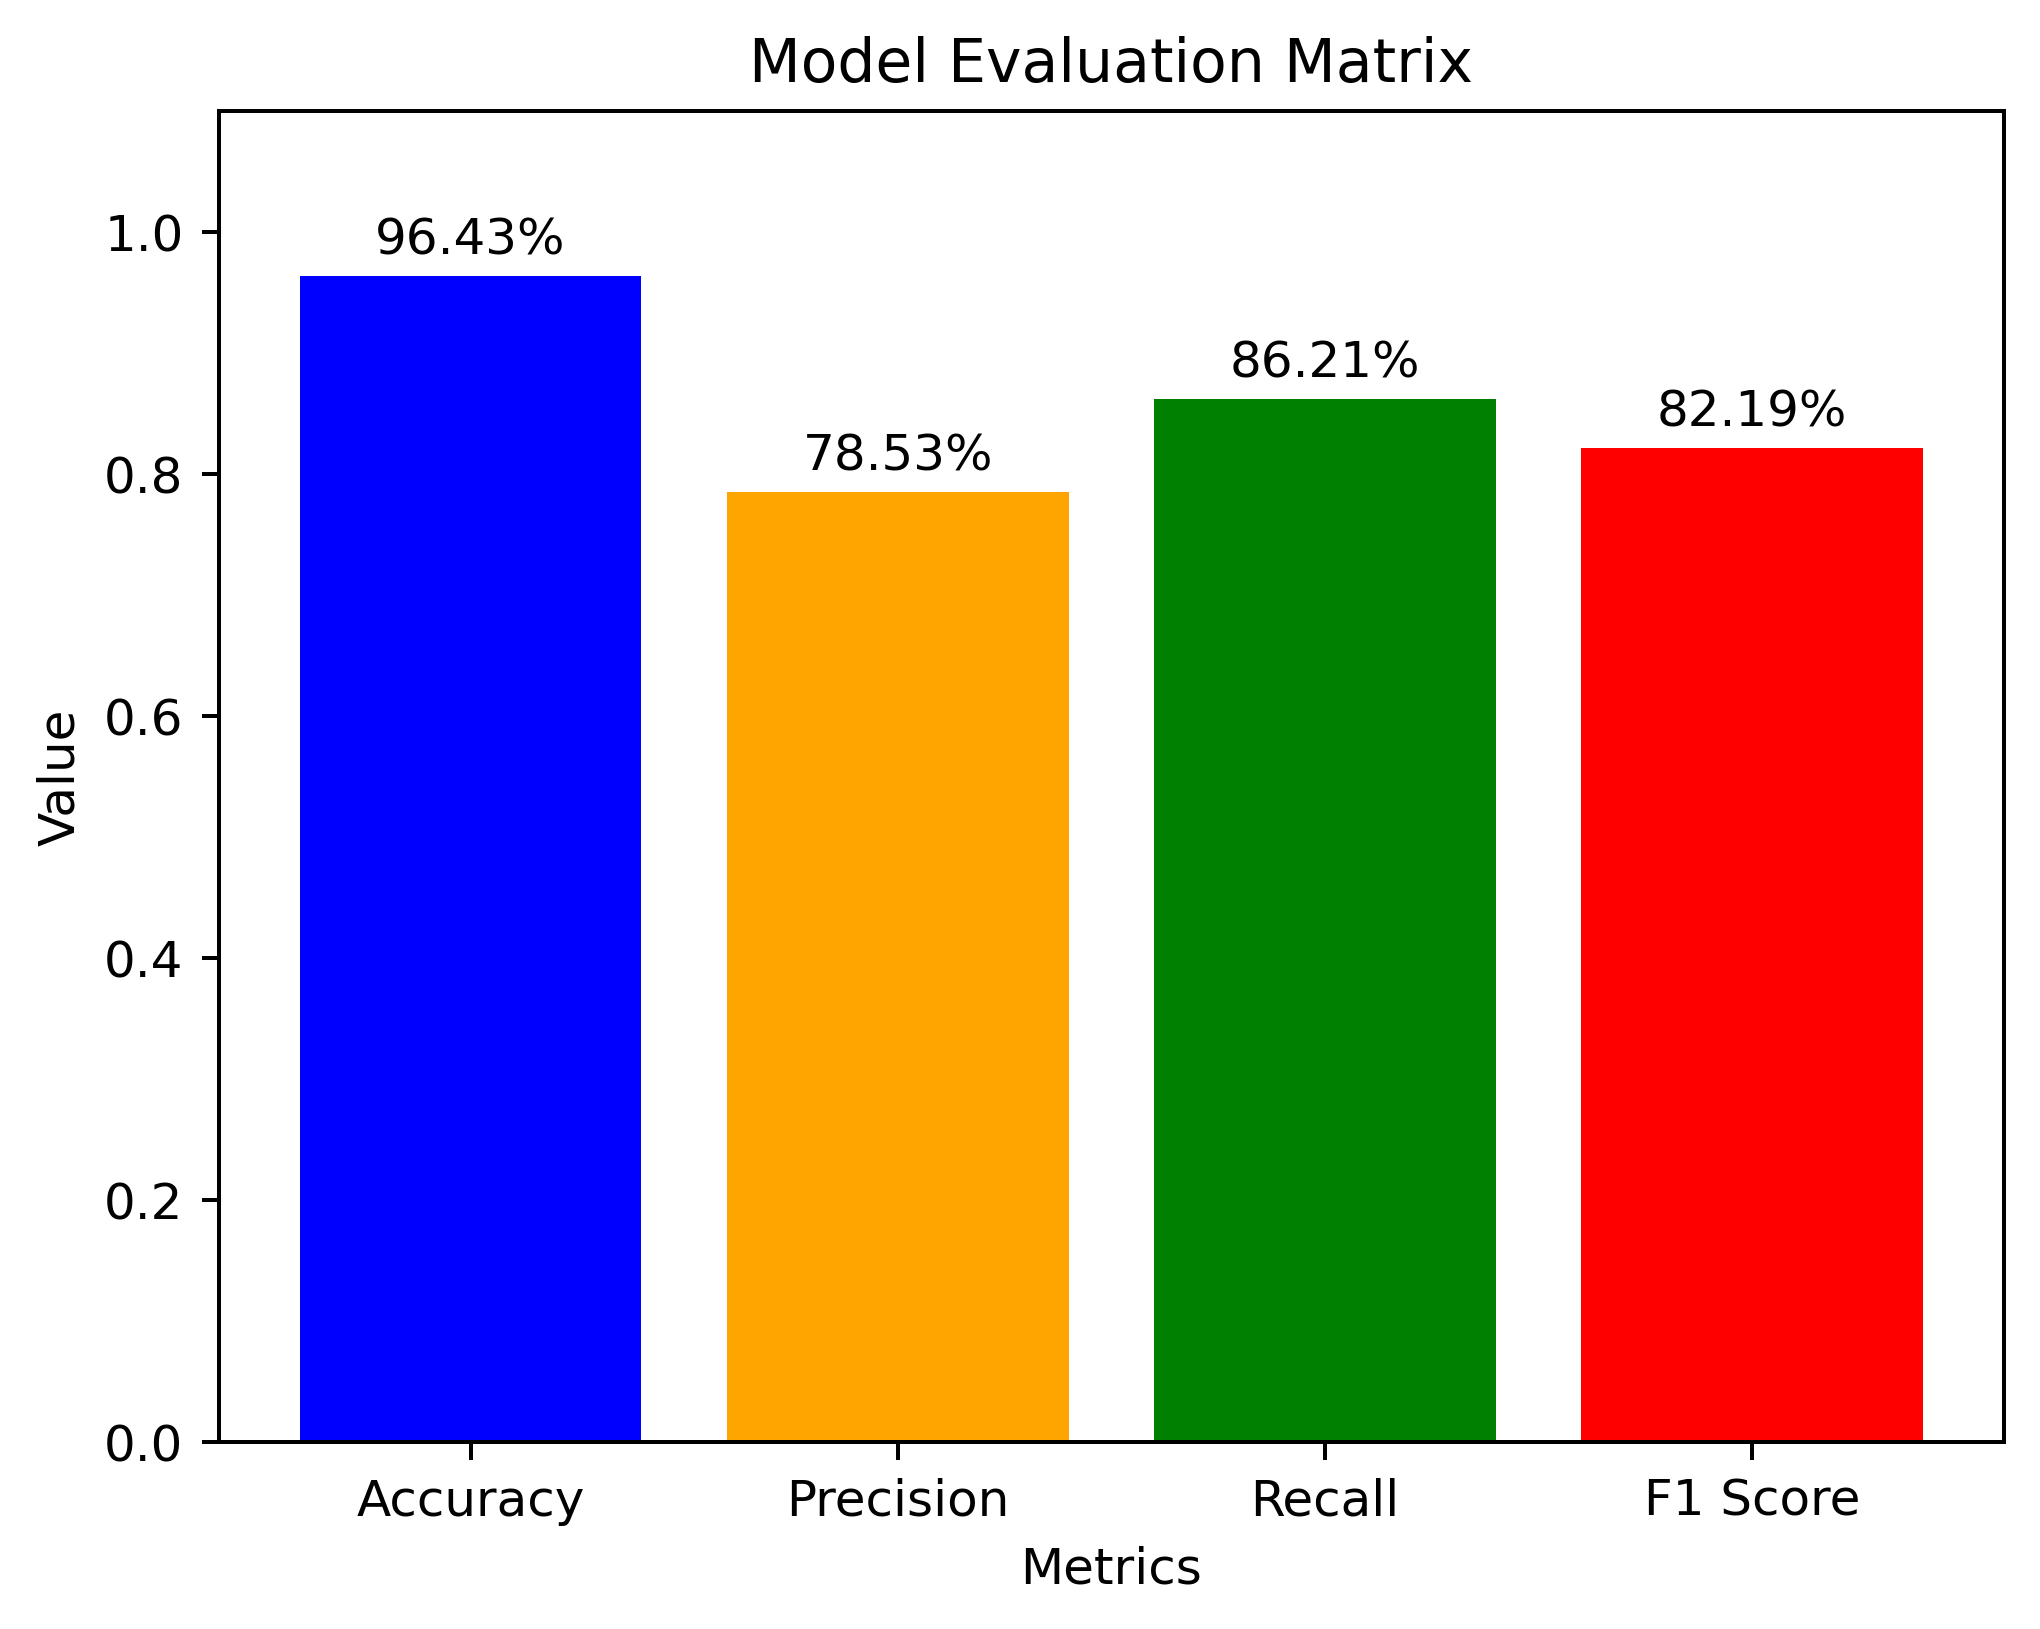

In [ ]:
import matplotlib.pyplot as plt

metrics_values = [accuracy, precision, recall, f1]

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

colors = ['blue', 'orange', 'green', 'red']

bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Evaluation Matrix')
plt.ylim([0.0, 1.1])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval*100:.2f}%', ha='center', va='bottom')  # va: vertical alignment

plt.show()


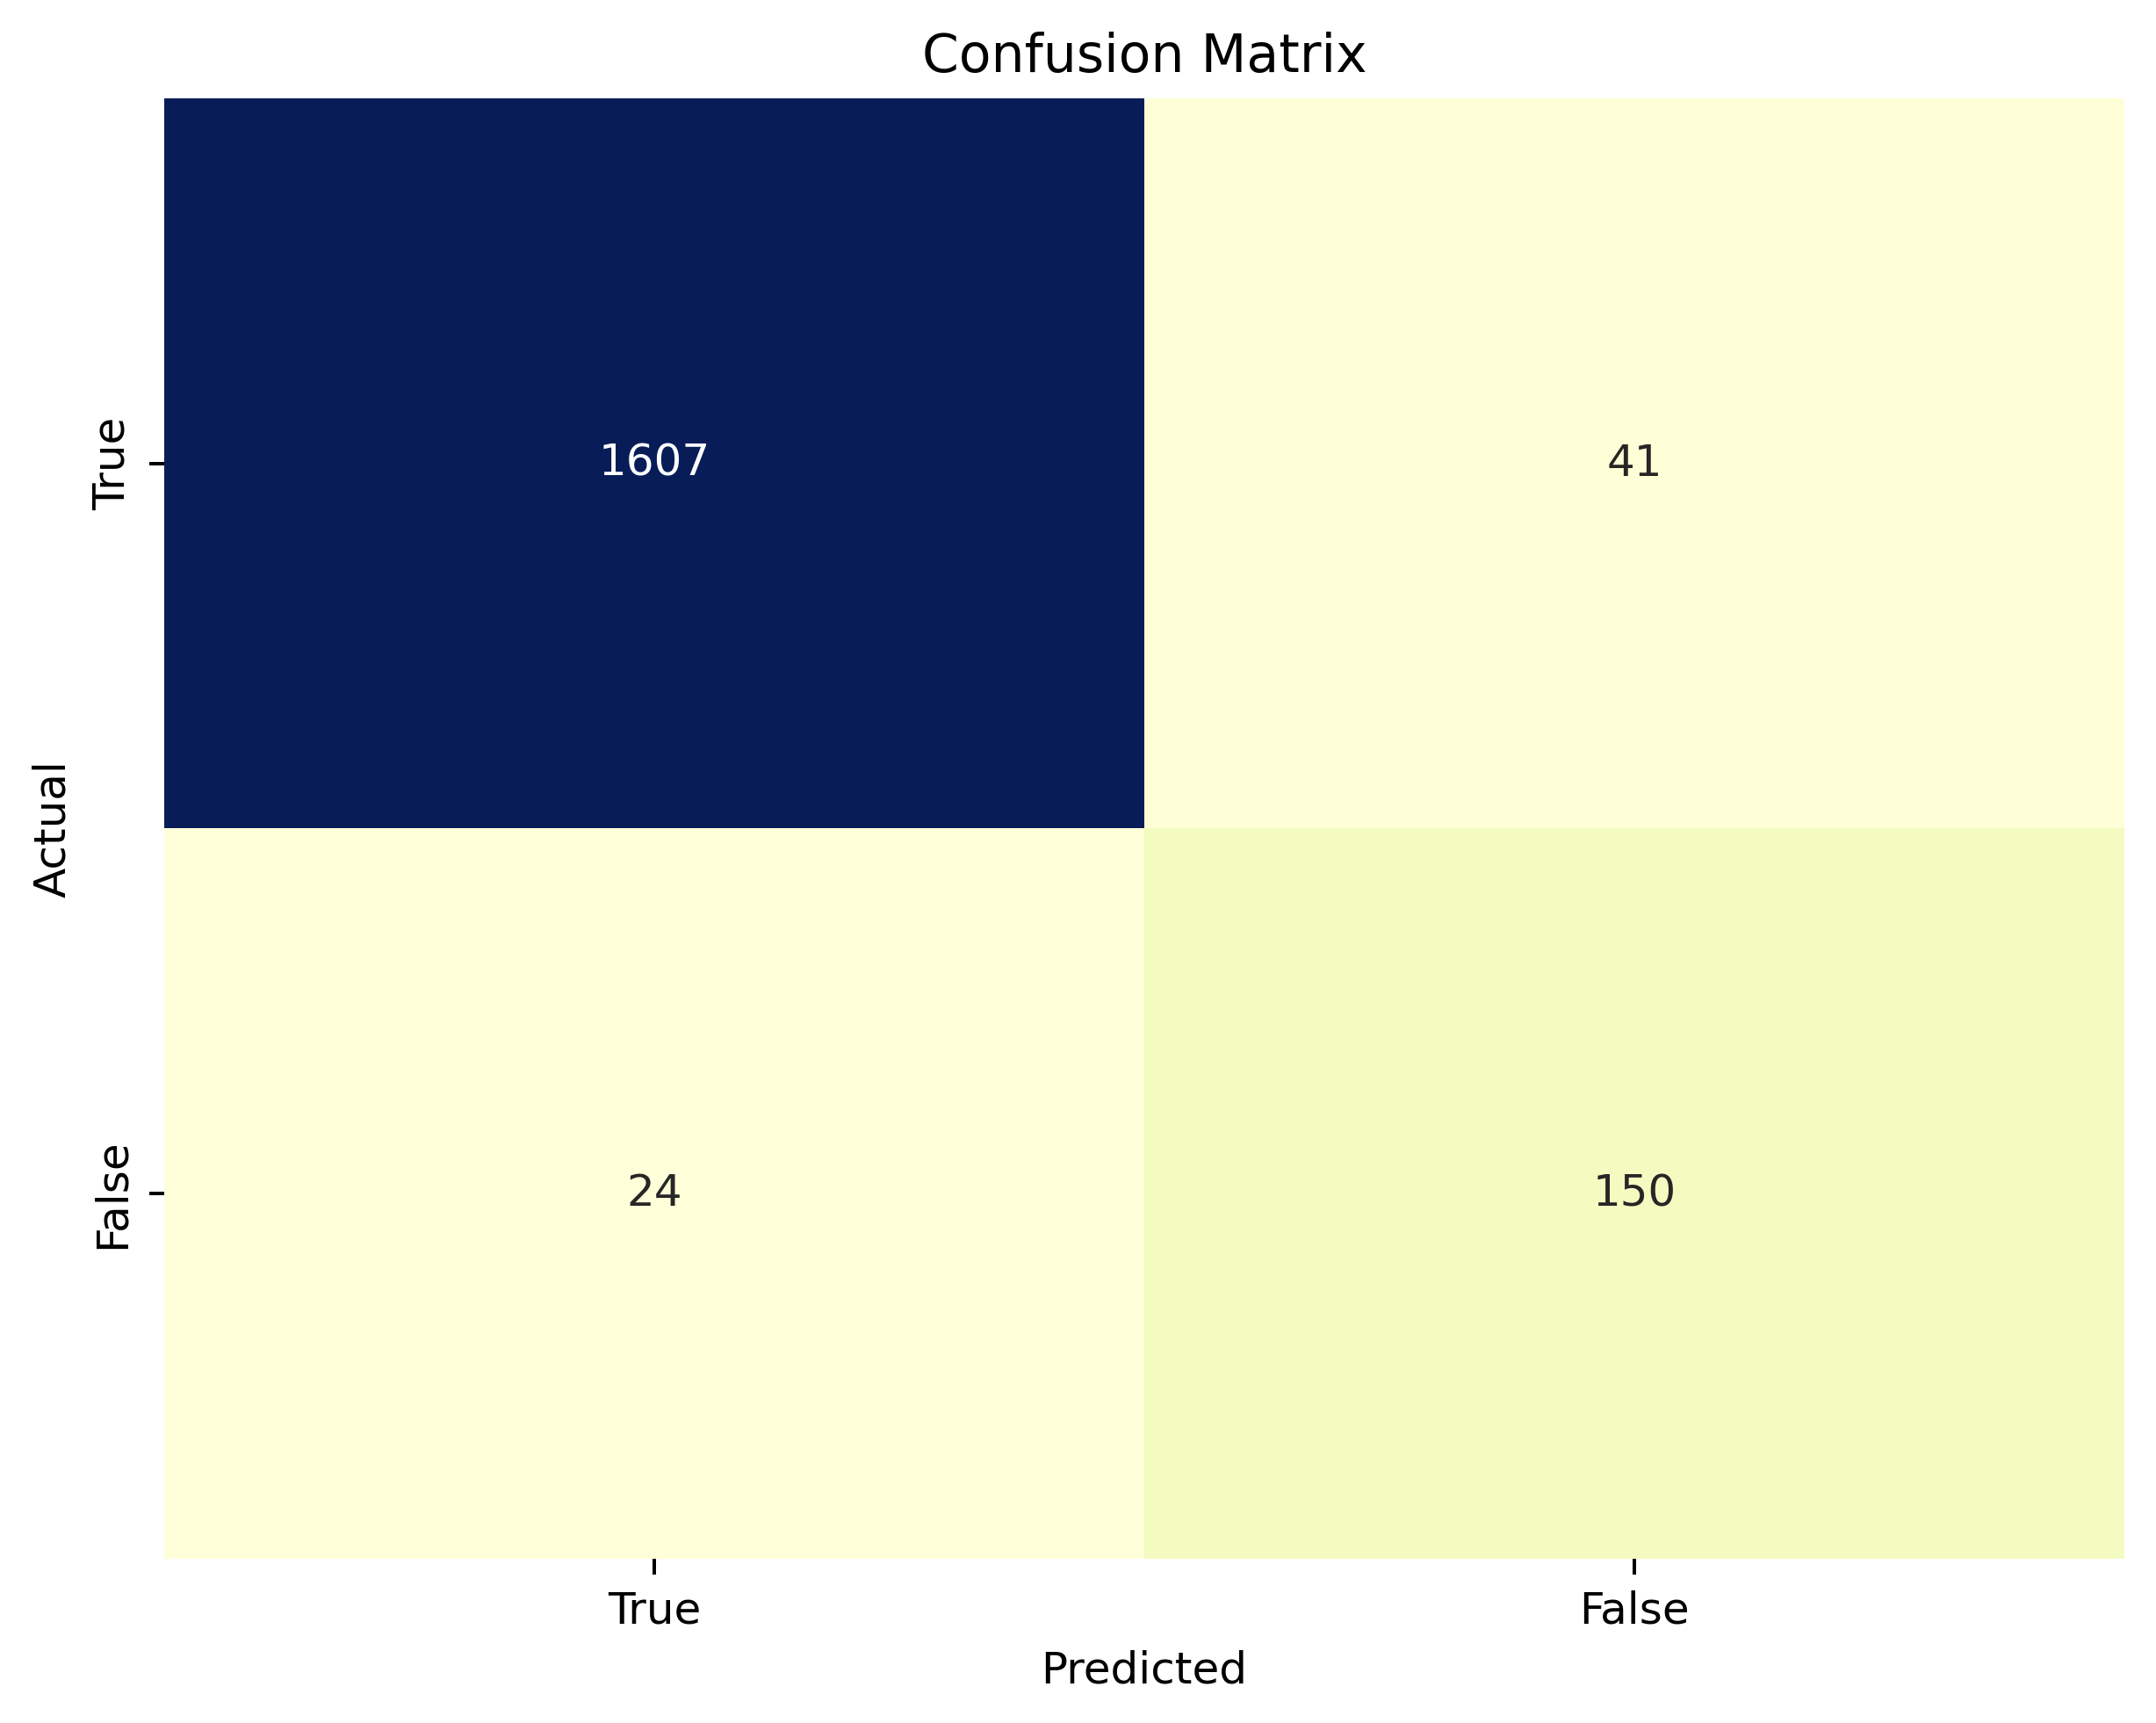

In [ ]:
cm = confusion_matrix(y_test, y_pred)

labels = ['True', 'False']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('confusion matrix')
print(cm)

confusion matrix
[[1607   41]
 [  24  150]]


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1648
           1       0.79      0.86      0.82       174

    accuracy                           0.96      1822
   macro avg       0.89      0.92      0.90      1822
weighted avg       0.97      0.96      0.97      1822



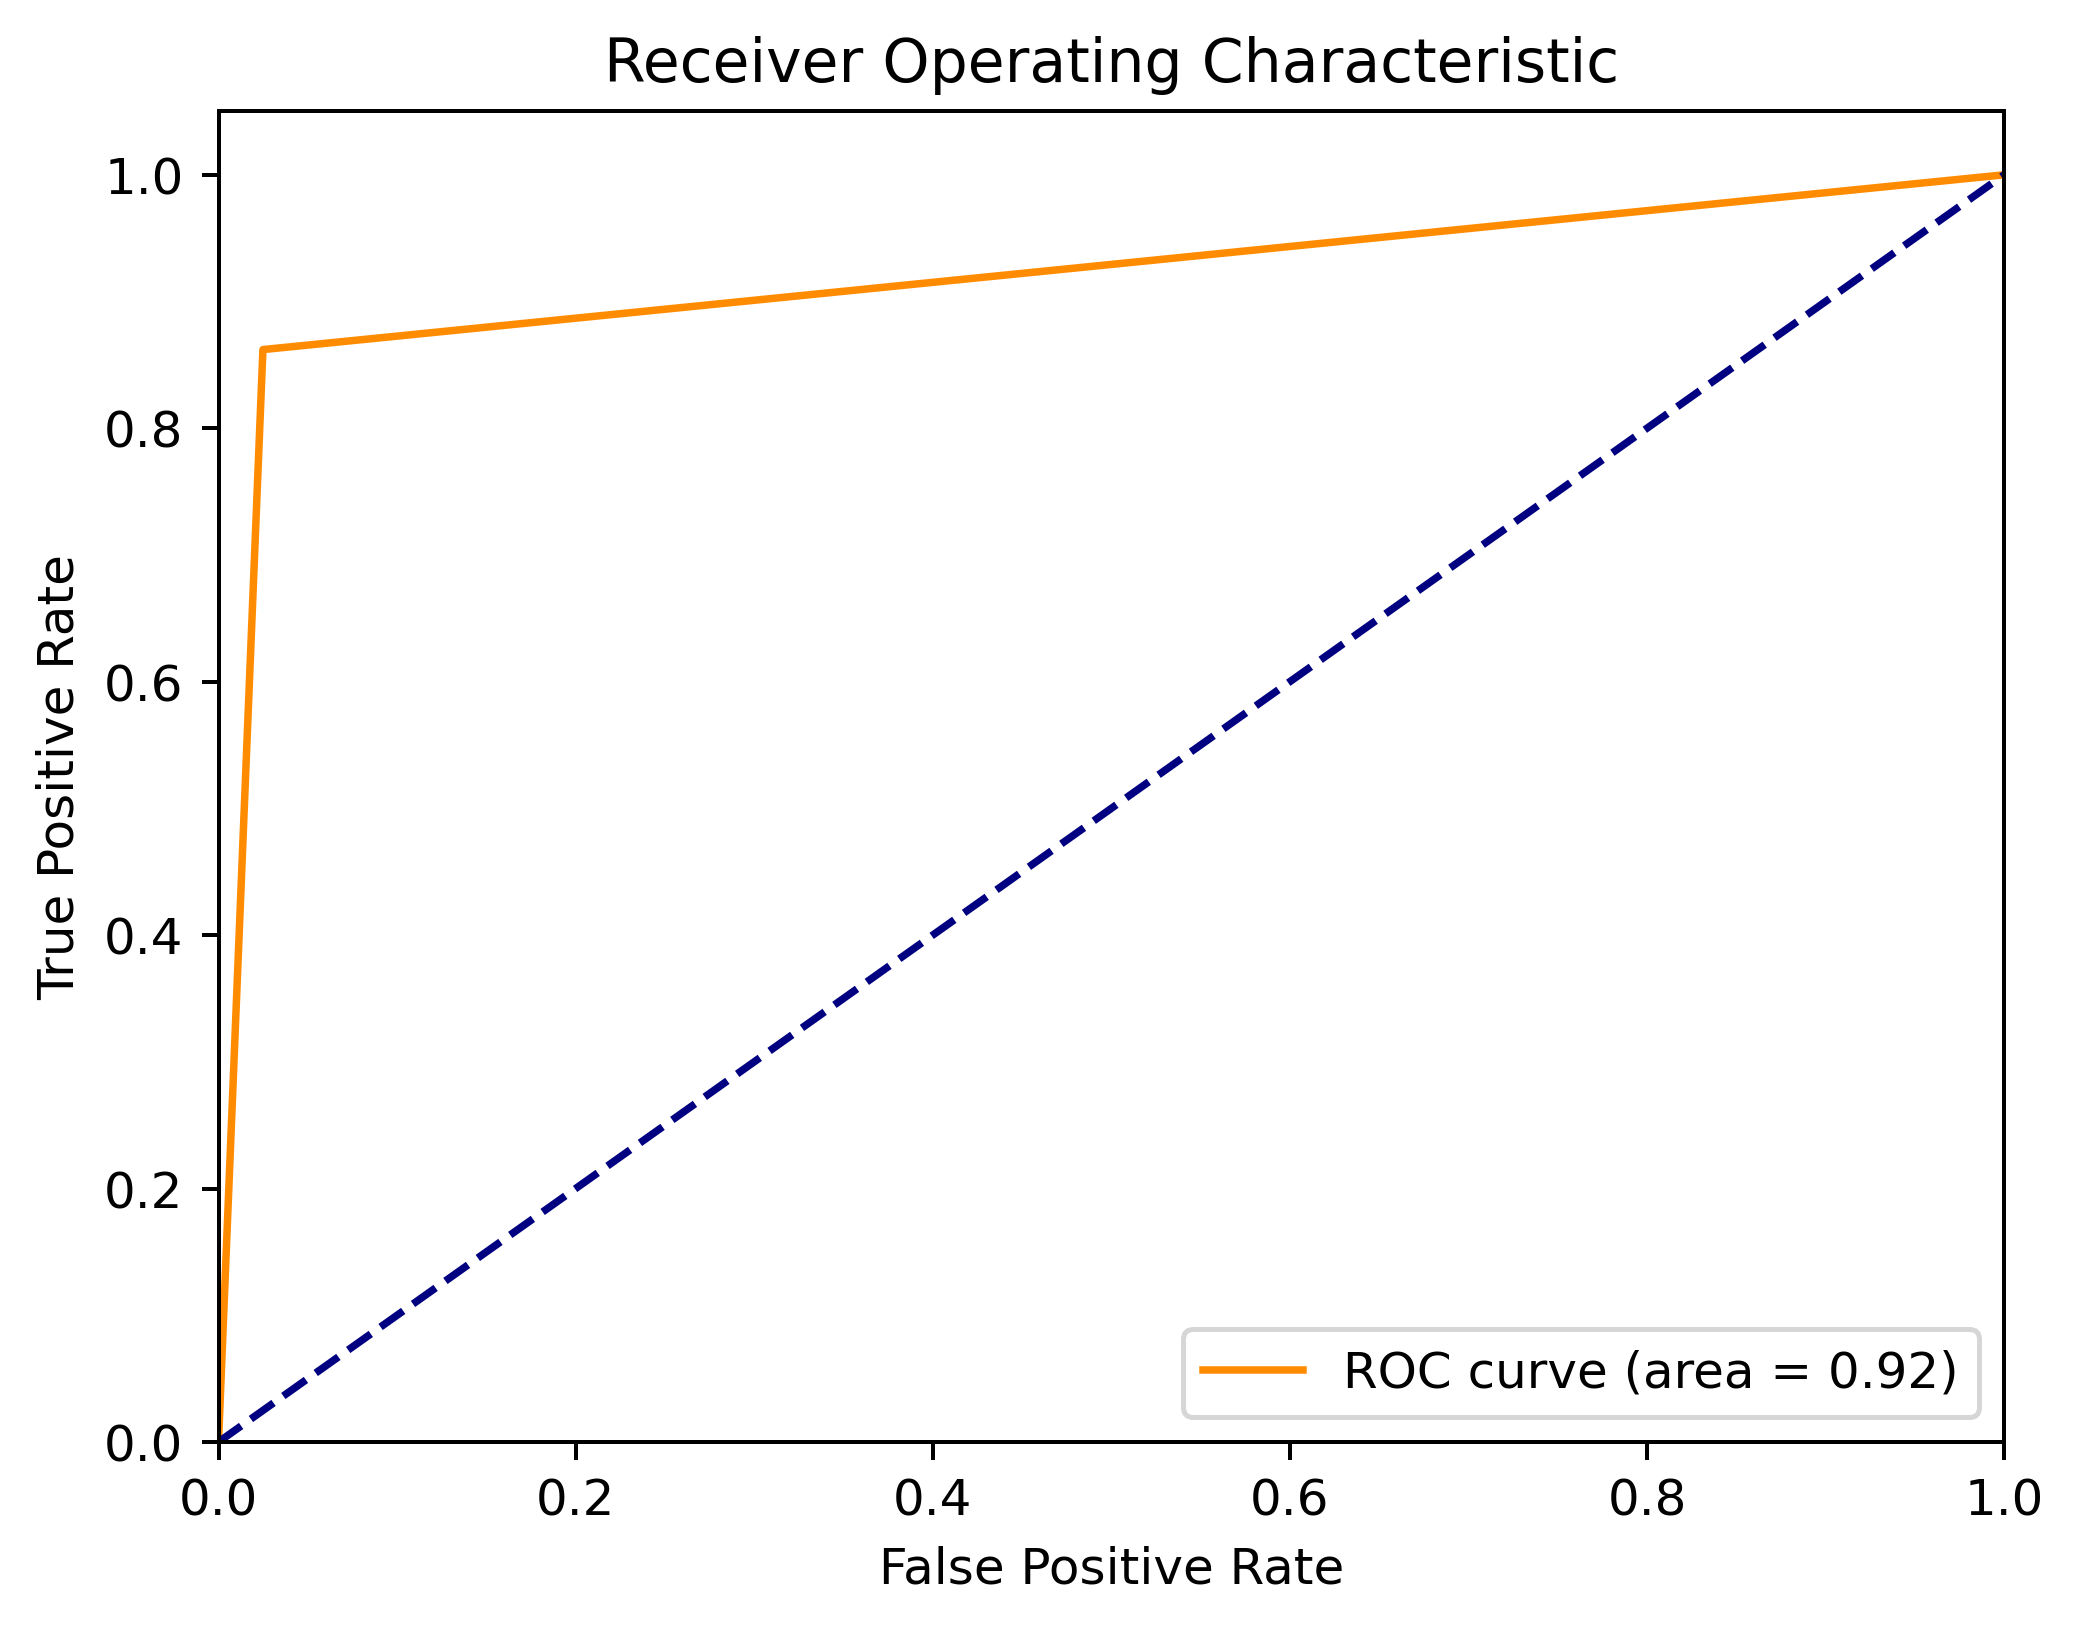

In [ ]:
# Calculate ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()